In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys
import mpl_scatter_density
import mplhep as hep
import matplotlib
import mpl_scatter_density

sys.path.append('../')
from utils import load
import torch

/export/home/phys/sdurgut/anaconda3/envs/deepmet5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
epoch = 89

In [3]:
prefix = '/export/home/phys/sdurgut/test_L1DeepMetv2/L1DeepMETv2'

ckpts = f'{prefix}/ckpts_ttbar_batch_32_lr_0.1_wd_0.001_loss_fn_response_tune_500_woembedding_090924/'

### Plot straight from the histogram saved in resolutions file

In [4]:
plt.style.use(hep.style.CMS)

a=load(ckpts + '/best.resolutions')
colors = {
#    'pfMET': 'black',
    'puppiMET': 'red',
#    'deepMETResponse': 'blue',
#    'deepMETResolution': 'green',
    'MET':  'magenta',
}
label_arr = {
    'MET':     'Graph MET' ,
#    'pfMET':    'PF MET',
    'puppiMET': 'PUPPI MET',
#    'deepMETResponse': 'DeepMETResponse',
#    'deepMETResolution': 'DeepMETResolution',
}
resolutions_arr = {
    'MET':      [[],[],[]],
#    'pfMET':    [[],[],[]],
    'puppiMET': [[],[],[]],
#    'deepMETResponse': [[],[],[]],
#    'deepMETResolution': [[],[],[]],
}

In [5]:
a.keys()

dict_keys(['MET', 'puppiMET'])

In [6]:
a['MET'].keys()

dict_keys(['u_perp_resolution', 'u_perp_scaled_resolution', 'u_par_resolution', 'u_par_scaled_resolution', 'R'])

In [7]:
a['MET']['u_perp_scaled_resolution']

(array([ 7.49239585, 17.73278882, 22.18080368, 23.74385117, 24.0205571 ,
        24.57208684, 24.31102991, 24.92225773, 25.88585307, 25.31780342,
        24.95966231, 28.77939366, 28.87975245, 24.07335855, 27.53772983,
        26.48870688, 28.97722469, 30.71395623, 28.54662781,  0.        ]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300., 320., 340., 360., 380., 400.]))

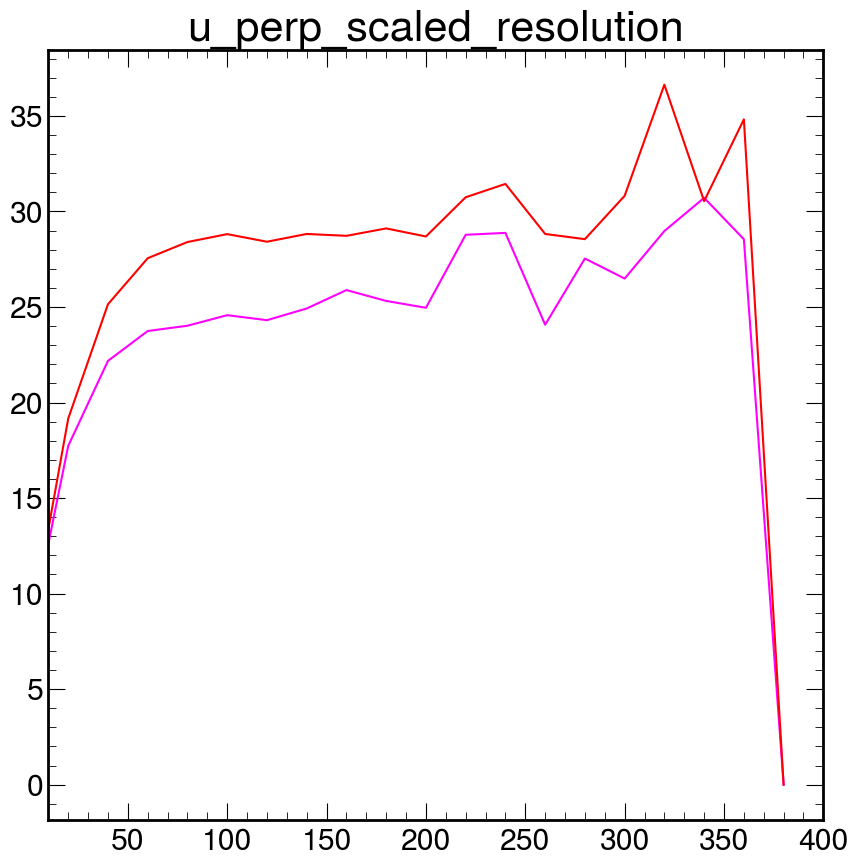

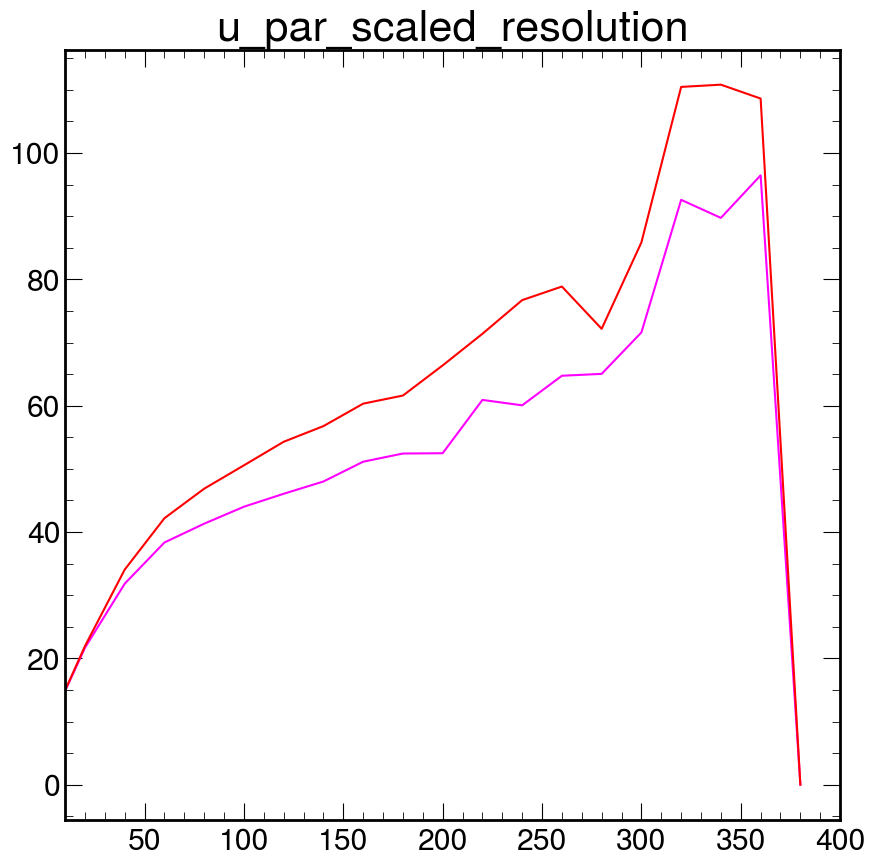

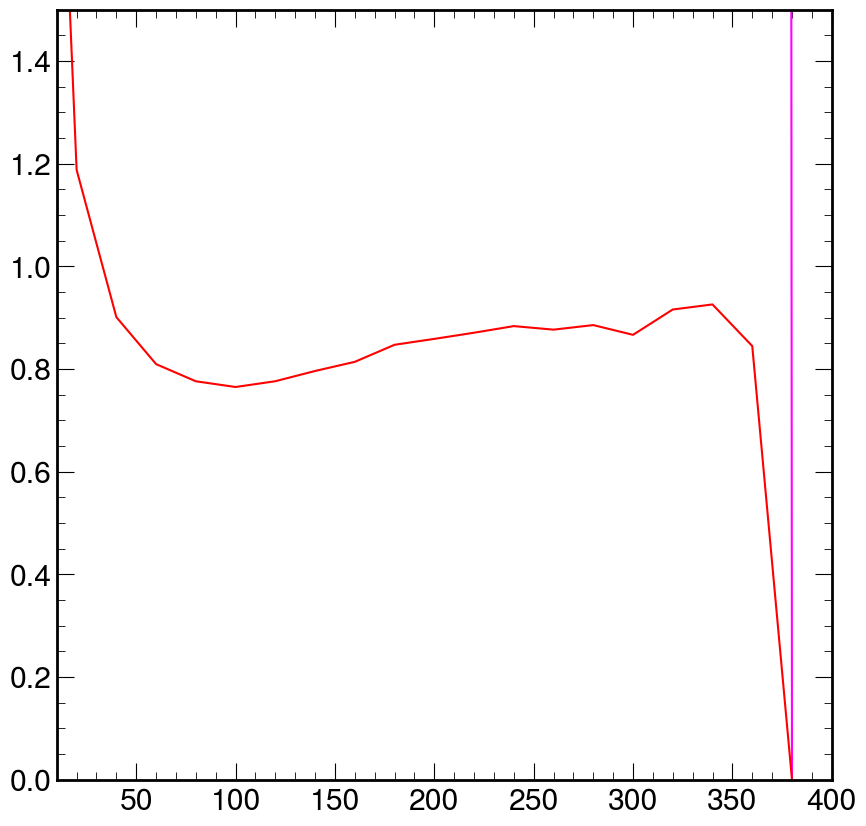

In [8]:
for key in resolutions_arr:
    #plt.figure(1)
    #xx = a[key]['u_perp_resolution'][1][0:40]
    #yy = a[key]['u_perp_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(2)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    plt.title('u_perp_scaled_resolution')
    #plt.figure(3)
    #xx = a[key]['u_par_resolution'][1][0:40]
    #yy = a[key]['u_par_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(4)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]
    plt.title('u_par_scaled_resolution')
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    plt.figure(5)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    
    plt.xlim([10,400])
    plt.ylim([0,1.5])

In [9]:
a['MET']['R'][0]/128

array([2.35772802, 0.99055148, 0.78986514, 0.73450946, 0.71467496,
       0.70569143, 0.70714613, 0.71248885, 0.71870652, 0.73420414,
       0.73715345, 0.73738655, 0.74478919, 0.72972167, 0.74355122,
       0.70573012, 0.73207188, 0.71809646, 0.70247577, 0.        ])

In [10]:
a['puppiMET']['R'][0]

array([3.02102682, 1.18796453, 0.90109424, 0.80948371, 0.7760669 ,
       0.76492642, 0.77618713, 0.79614099, 0.81397467, 0.84720341,
       0.85867768, 0.87066191, 0.88356658, 0.87665641, 0.88555569,
       0.86654868, 0.91591168, 0.92576871, 0.84468913, 0.        ])

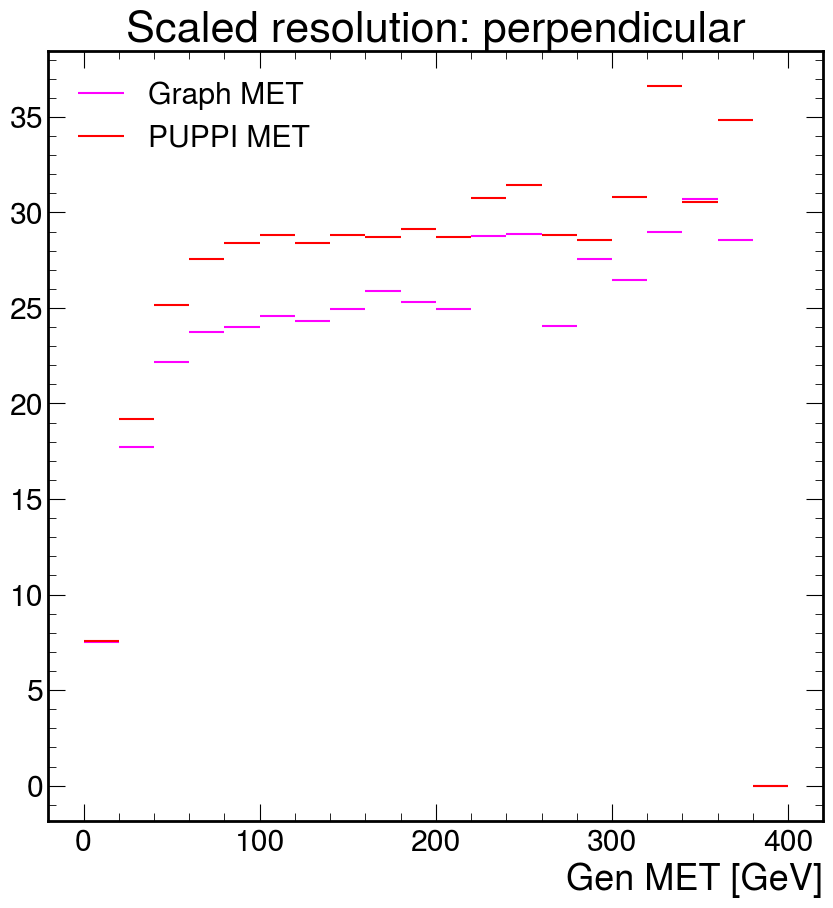

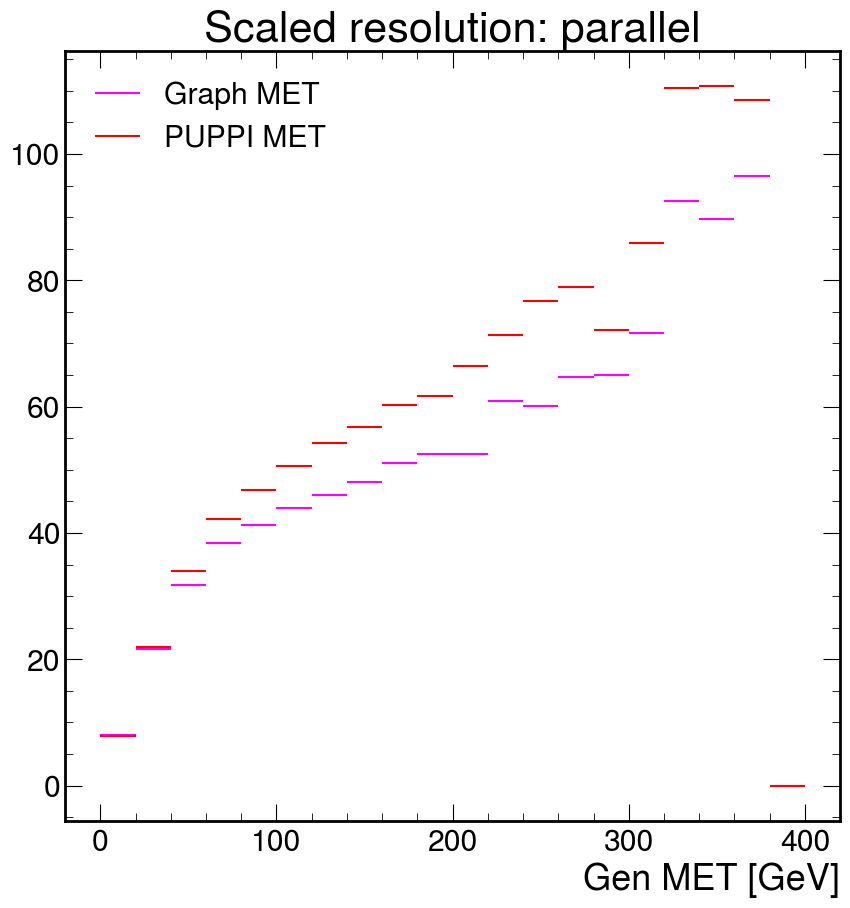

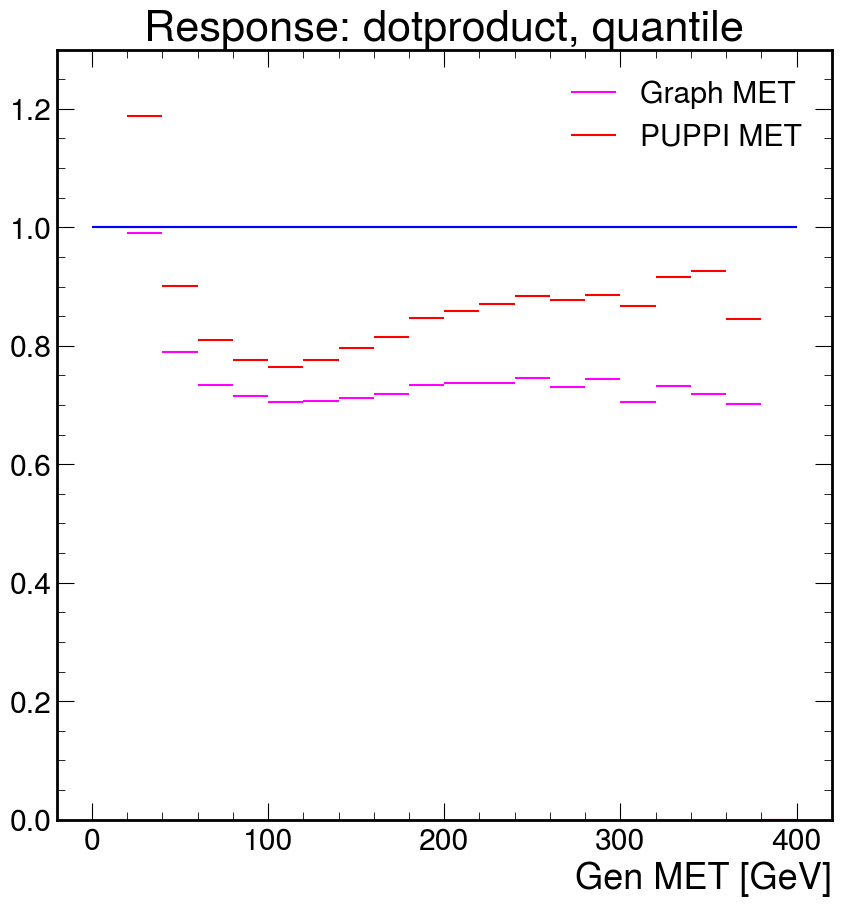

In [11]:
for key in resolutions_arr:
    # perp resolution scaled
    plt.figure(1)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: perpendicular')
    
    # parallel resolution scaled
    plt.figure(2)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0] 

    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: parallel')
    
    # response (using quantile)
    plt.figure(3)
    xx = a[key]['R'][1][0:20]
    if key == 'MET':
        yy = a[key]['R'][0]/128
    else:
        yy = a[key]['R'][0]
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')

    #plt.xlim([10,400])
    plt.ylim([0,1.3])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response: dotproduct, quantile')


In [12]:
genMETx = glob.glob('{}/epoch{}_genMETx*'.format(ckpts, epoch))[0]
genMETy = glob.glob('{}/epoch{}_genMETy*'.format(ckpts, epoch))[0]

#genMETx = glob.glob('{}/epoch{}_true_px*'.format(ckpts, epoch))[0]
#genMETy = glob.glob('{}/epoch{}_true_py*'.format(ckpts, epoch))[0]

METx = glob.glob('{}/epoch{}_METx*'.format(ckpts, epoch))[0]
METy = glob.glob('{}/epoch{}_METy*'.format(ckpts, epoch))[0]

puppiMETx = glob.glob('{}/epoch{}_puppiMETx*'.format(ckpts, epoch))[0]
puppiMETy = glob.glob('{}/epoch{}_puppiMETy*'.format(ckpts, epoch))[0]

In [13]:
genMETx = np.loadtxt(genMETx, delimiter=',')
genMETy = np.loadtxt(genMETy, delimiter=',')

METx = np.loadtxt(METx, delimiter=',')
METy = np.loadtxt(METy, delimiter=',')

puppiMETx = np.loadtxt(puppiMETx, delimiter=',')
puppiMETy = np.loadtxt(puppiMETy, delimiter=',')

In [14]:
METx, METy, genMETx, genMETy, puppiMETx, puppiMETy

(array([ -6150.55761719,  -2660.91113281, -13312.66699219, ...,
         -3020.90087891,    591.56738281,    957.5380249 ]),
 array([ 4400.20898438, -3279.19213867,  4799.65234375, ...,
          696.60424805,  1405.38916016, -5592.31347656]),
 array([-41.06822586,   7.5861578 , -61.76402283, ...,  40.24227905,
         25.79489899, -10.98165226]),
 array([ 19.62102509, -35.80776596,  25.82713127, ..., -35.79869461,
         13.2900095 , -33.04679871]),
 array([ -32.4054985 ,  -10.77658272, -106.28908539, ...,  -66.67492676,
          -5.43266582,   18.45227051]),
 array([ 57.1677742 , -12.83492756,  39.36676407, ...,  34.73376846,
        -27.84331703, -58.37015915]))

In [15]:
METx = METx/128 
METy = METy/128

In [16]:
genMETx, genMETy, METx, METy, puppiMETx, puppiMETy

(array([-41.06822586,   7.5861578 , -61.76402283, ...,  40.24227905,
         25.79489899, -10.98165226]),
 array([ 19.62102509, -35.80776596,  25.82713127, ..., -35.79869461,
         13.2900095 , -33.04679871]),
 array([ -48.05123138,  -20.78836823, -104.00521088, ...,  -23.60078812,
           4.62162018,    7.48076582]),
 array([ 34.37663269, -25.61868858,  37.49728394, ...,   5.44222069,
         10.97960281, -43.68994904]),
 array([ -32.4054985 ,  -10.77658272, -106.28908539, ...,  -66.67492676,
          -5.43266582,   18.45227051]),
 array([ 57.1677742 , -12.83492756,  39.36676407, ...,  34.73376846,
        -27.84331703, -58.37015915]))

### Plot predicted vs. gen MET

(-600.0, 600.0)

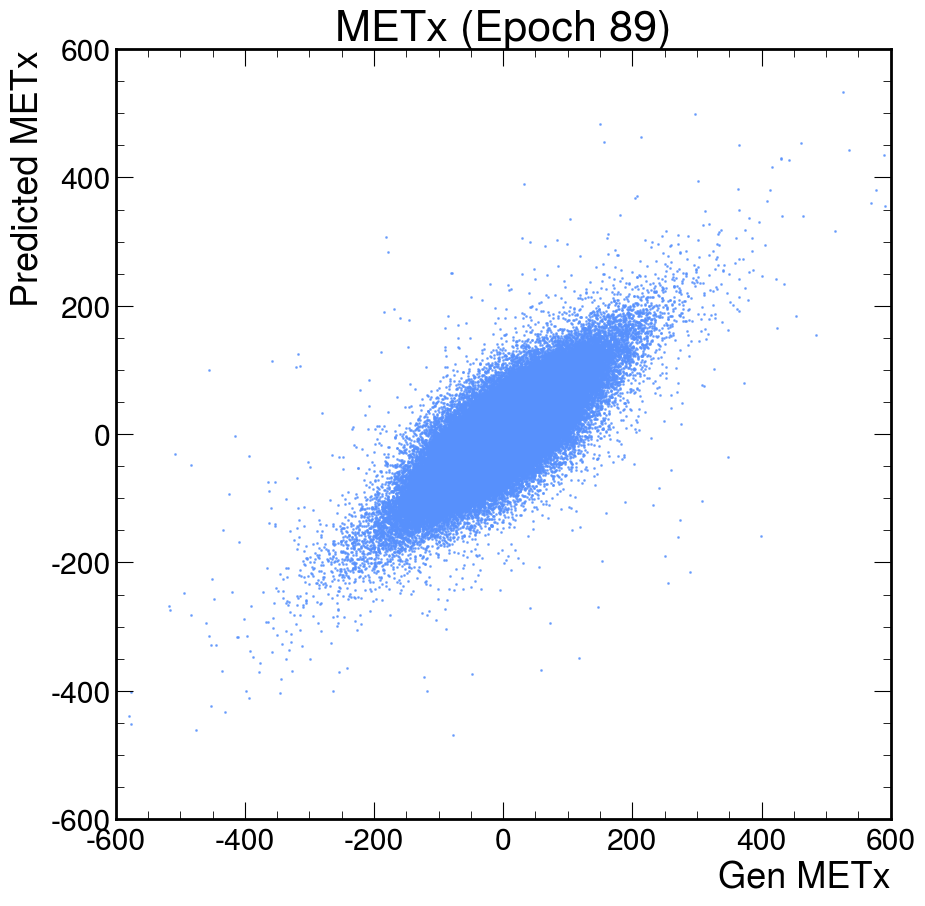

In [17]:
plt.scatter(genMETx, METx, s=1, alpha=0.7)
plt.xlabel('Gen METx')
plt.ylabel('Predicted METx')
plt.title(f'METx (Epoch {epoch})')

plt.xlim([-600,600])
plt.ylim([-600,600])

(-600.0, 600.0)

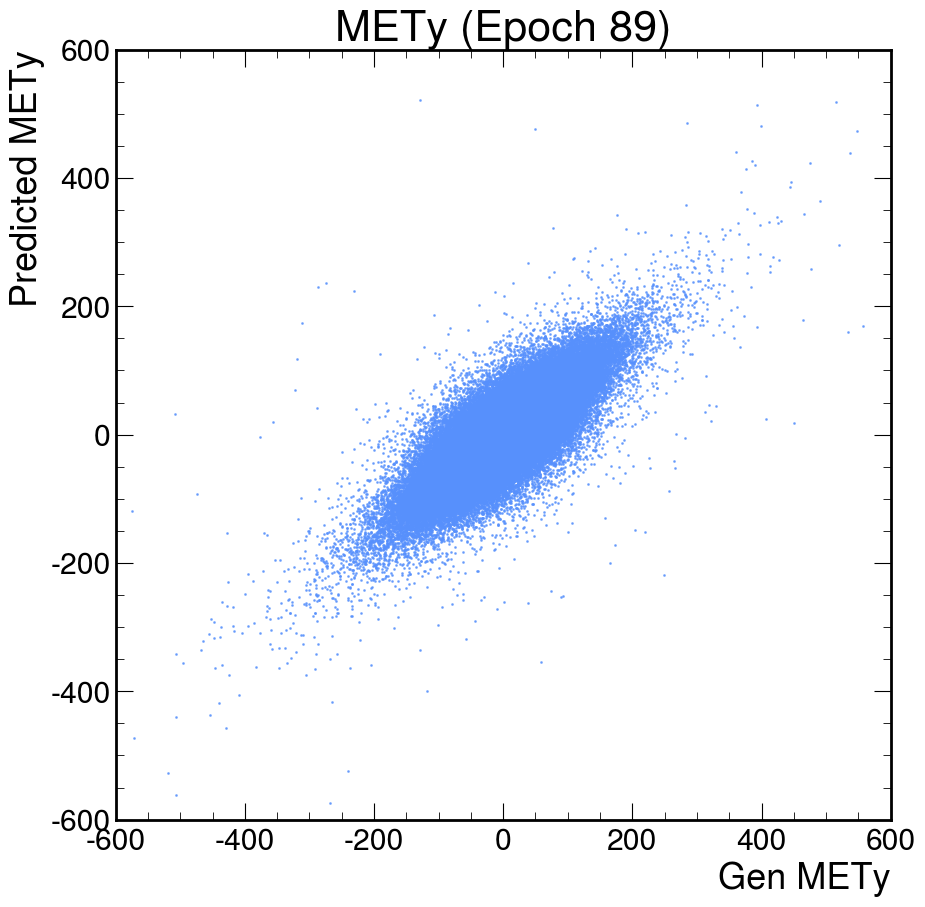

In [92]:
plt.scatter(genMETy, METy, s=1, alpha=0.7)
plt.xlabel('Gen METy')
plt.ylabel('Predicted METy')
plt.title(f'METy (Epoch {epoch})')

plt.xlim([-600,600])
plt.ylim([-600,600])

In [18]:
genMET = np.sqrt(genMETx **2 + genMETy **2)
MET = np.sqrt(METx **2 + METy **2)
puppiMET = np.sqrt(puppiMETx **2 + puppiMETy **2)

In [19]:
MET

array([ 59.08192374,  32.99202113, 110.55826605, ...,  24.22013554,
        11.91264249,  44.32576569])

/tmp/user/13383/ipykernel_837048/3652224234.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(genMET, MET, s=0.1, alpha=0.7, norm=matplotlib.colors.LogNorm(), cmap='jet')


(0.0, 500.0)

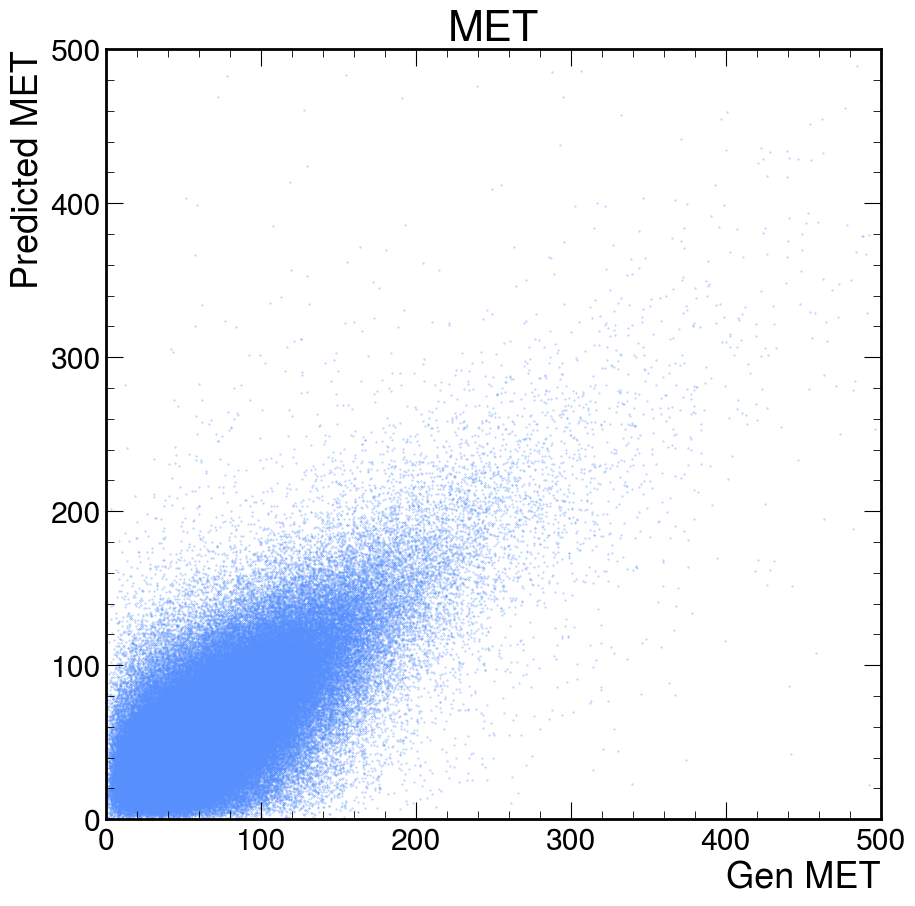

In [20]:
plt.scatter(genMET, MET, s=0.1, alpha=0.7, norm=matplotlib.colors.LogNorm(), cmap='jet')

#plt.colorbar()

plt.xlabel('Gen MET')
plt.ylabel('Predicted MET')
plt.title(f'MET')

plt.xlim([0,500])
plt.ylim([0,500])

/tmp/user/13383/ipykernel_837048/3264506433.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  density = ax1.scatter_density(x, y, cmap=plt.cm.get_cmap('magma'))
/export/home/phys/sdurgut/anaconda3/envs/deepmet5/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/export/home/phys/sdurgut/anaconda3/envs/deepmet5/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


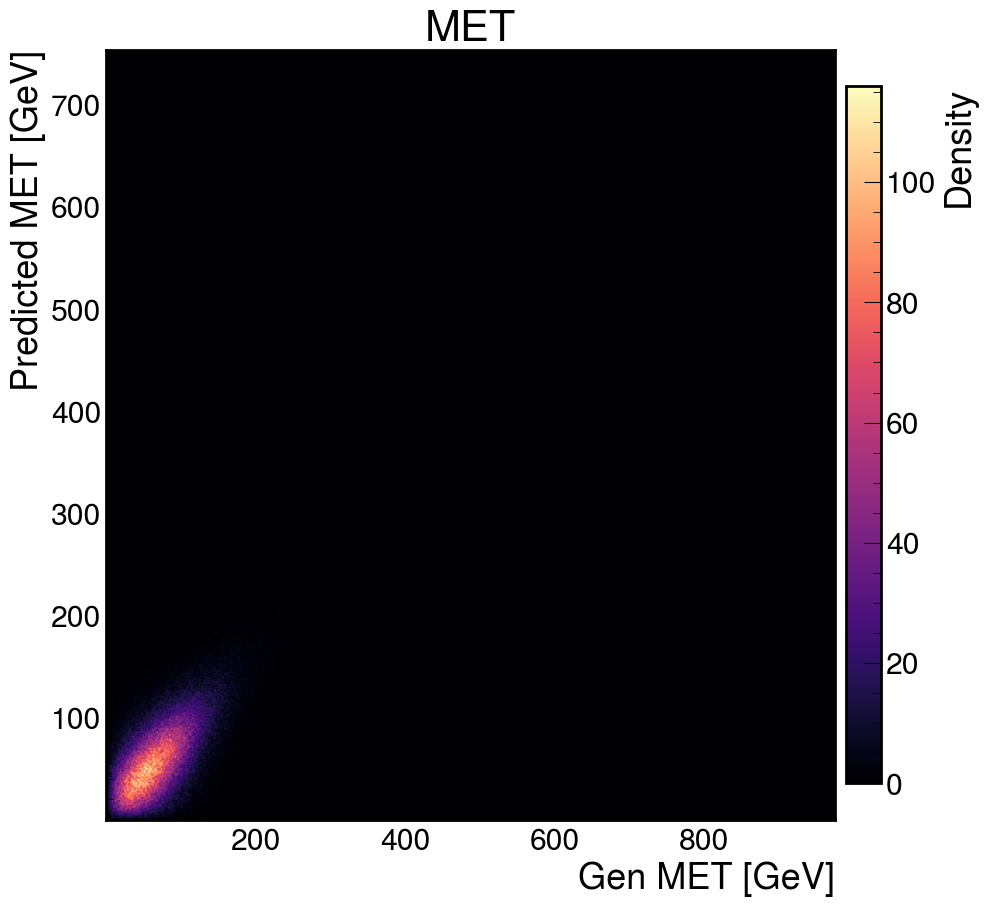

In [21]:
# density plot
def plot_density(x, y, xlabel='', ylabel='', title='', zlabel='', xlim=[], doSave=False, figName='plot'):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1, projection='scatter_density')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    if len(xlim) != 0:
        ax1.set_xlim(xlim)
    ax1.set_title(title)

    density = ax1.scatter_density(x, y, cmap=plt.cm.get_cmap('magma'))
    fig1.colorbar(density, ax=ax1, fraction=0.045, pad=0.015, label=zlabel)
    
    if doSave:
        plt.savefig('{}.pdf'.format(figName),  bbox_inches='tight')
    
    plt.show()
plot_density(genMET, MET, 'Gen MET [GeV]', 'Predicted MET [GeV]', 'MET', 'Density', [0,500], doSave=True, figName='MET_density')

### Calculate and plot the response

In [22]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(genMET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(genMET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))

# Take the mean for each bin
response = ml_means / truth_means

Text(0.5, 1.0, 'px, py, pT scaled by 128')

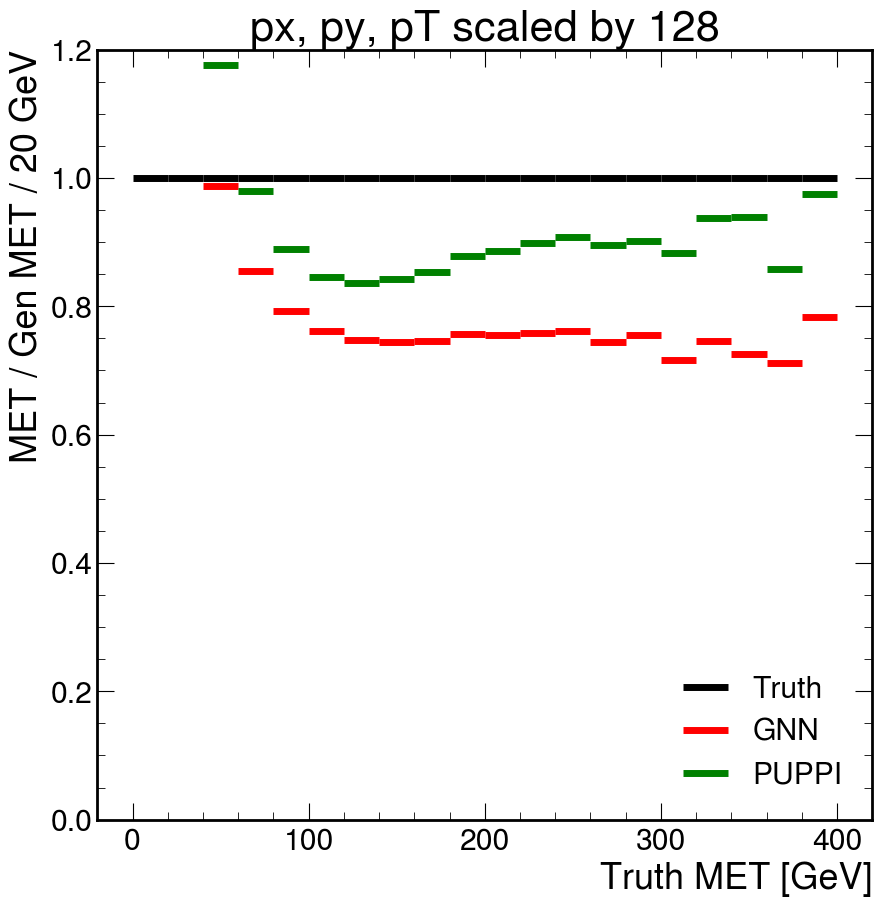

In [23]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Truth MET [GeV]')
plt.legend(loc='lower right')
plt.ylabel(f'MET / Gen MET / {binnings[1]-binnings[0]:.0f} GeV')

plt.title('px, py, pT scaled by 128')

In [25]:
response_pT = MET / genMET

In [26]:
response_pT.mean()

1.0872561959385576

In [27]:
puppiMET = 128*puppiMET

In [33]:
puppiMET = puppiMET / 128

In [34]:
puppiMET

array([ 65.71355066,  16.75917959, 113.34510041, ...,  75.17965503,
        28.3683655 ,  61.21733224])

In [35]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(genMET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(genMET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))

# Take the mean for each bin
response = ml_means / truth_means

In [36]:
# mean of puppiMET 
# in the bin of genMET
# for example, the events in the first genMET bin [0,20], the mean of the puppiMET is puppi_means[0]
puppi_means

array([ 48.07888101,  51.41071635,  58.98816776,  68.39628052,
        79.5214294 ,  92.29837199, 107.85761711, 125.65875617,
       144.0552172 , 166.01948238, 185.30605331, 206.06043838,
       226.07040622, 241.38630834, 261.35662645, 273.68865019,
       309.56304436, 327.91215734, 318.46912552, 380.03706932])

In [37]:
truth_means

array([ 13.26398198,  30.79088003,  50.18161772,  69.77791354,
        89.49588351, 109.19222027, 128.98310357, 149.0613522 ,
       168.89982776, 188.99171145, 209.16320013, 229.4585657 ,
       248.88791303, 269.41867614, 289.60909075, 309.85467656,
       330.12071591, 348.94234532, 370.81705341, 389.67338279])

In [38]:
ml_means

array([ 37.59861847,  41.62596046,  49.54592838,  59.65687455,
        70.96538899,  83.11781209,  96.49799139, 110.93842587,
       125.92305782, 142.9141126 , 157.81424249, 173.91619428,
       189.67308163, 200.44977651, 218.87263665, 222.11982674,
       246.18378487, 253.41018236, 263.62708822, 305.35011643])

In [39]:
binnings

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])

In [40]:
response

array([2.83464034, 1.35189252, 0.98733223, 0.85495355, 0.79294585,
       0.76120636, 0.74814444, 0.74424674, 0.74554876, 0.75619249,
       0.75450291, 0.75794161, 0.76208233, 0.74400847, 0.75575196,
       0.71685162, 0.74573867, 0.72622365, 0.71093572, 0.78360527])

Text(0.5, 1.0, 'px, py, pT scaled by 128')

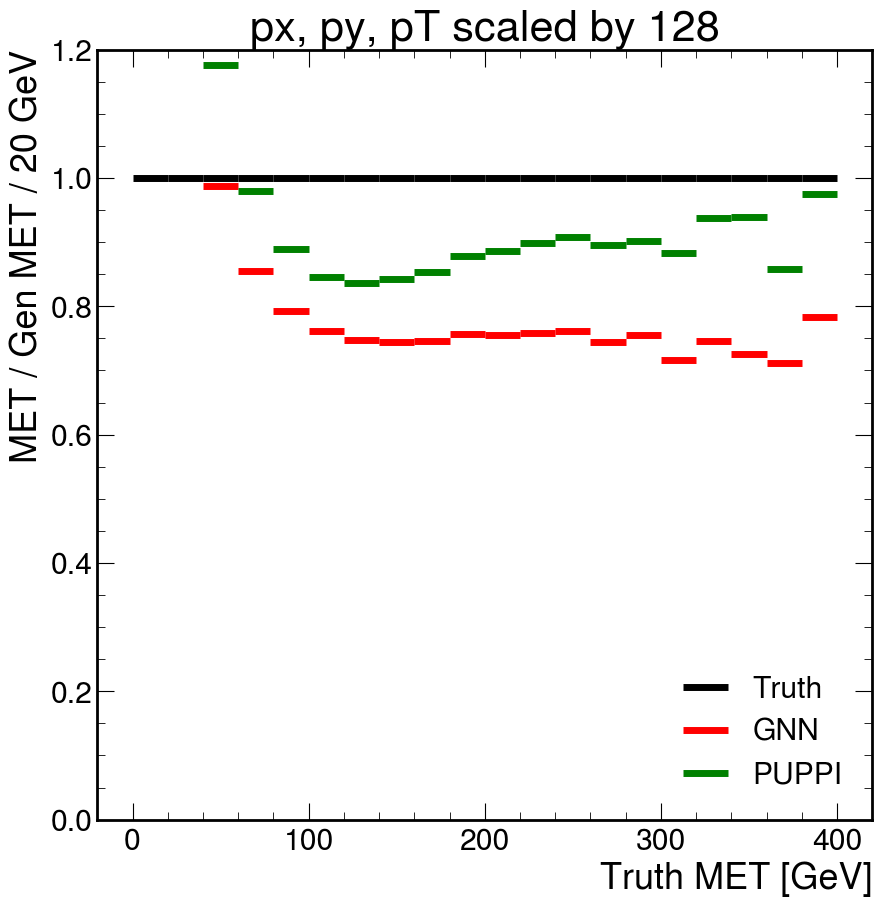

In [42]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Truth MET [GeV]')
plt.legend(loc='lower right')
plt.ylabel(f'MET / Gen MET / {binnings[1]-binnings[0]:.0f} GeV')

plt.title('px, py, pT scaled by 128')

### resolution

In [43]:
qTx = torch.from_numpy(genMETx)
qTy = torch.from_numpy(genMETy)

v_qT = torch.stack((qTx, qTy), dim=1)

v_qT

tensor([[-41.0682,  19.6210],
        [  7.5862, -35.8078],
        [-61.7640,  25.8271],
        ...,
        [ 40.2423, -35.7987],
        [ 25.7949,  13.2900],
        [-10.9817, -33.0468]], dtype=torch.float64)

In [58]:
MLMETx = torch.from_numpy(METx)
MLMETy = torch.from_numpy(METy)

v_MET = torch.stack((MLMETx, MLMETy), dim=1)
v_MET

tensor([[ -48.0512,   34.3766],
        [ -20.7884,  -25.6187],
        [-104.0052,   37.4973],
        ...,
        [ -23.6008,    5.4422],
        [   4.6216,   10.9796],
        [   7.4808,  -43.6899]], dtype=torch.float64)

In [59]:
PUPPIMETx = torch.from_numpy(puppiMETx)
PUPPIMETy = torch.from_numpy(puppiMETy)

v_puppiMET = torch.stack((PUPPIMETx, PUPPIMETy), dim=1)

v_puppiMET

tensor([[ -32.4055,   57.1678],
        [ -10.7766,  -12.8349],
        [-106.2891,   39.3668],
        ...,
        [ -66.6749,   34.7338],
        [  -5.4327,  -27.8433],
        [  18.4523,  -58.3702]], dtype=torch.float64)

In [60]:
# tensor operations
def getdot(vx, vy):
    return torch.einsum('bi,bi->b',vx,vy)

def getscale(vx):
    return torch.sqrt(getdot(vx,vx))

def scalermul(a,v):
    return torch.einsum('b,bi->bi',a,v)

In [61]:
resolutions_arr = {}

def compute(vector):
    #response = getdot(vector,v_qT)/getdot(v_qT,v_qT)
    response = getscale(vector)/getscale(v_qT)

    v_paral_predict = scalermul(response, v_qT)
    u_paral_predict = getscale(v_paral_predict) - getscale(v_qT)
    v_perp_predict = vector - v_paral_predict
    u_perp_predict = getscale(v_perp_predict)
    
    return [u_perp_predict.numpy(), u_paral_predict.numpy(), response.numpy()]

In [62]:
resolutions_arr['MET'] = compute(v_MET)
resolutions_arr['puppiMET'] = compute(v_puppiMET)

In [63]:
resolutions_arr['MET'][2]

array([1.29808573, 0.9013588 , 1.65144181, ..., 0.44968007, 0.41053649,
       1.27286334])

In [64]:
resolutions_arr['puppiMET'][2]

array([1.44378884, 0.45786931, 1.69306959, ..., 1.3958135 , 0.97763776,
       1.75792334])

In [65]:
# compute mean of all metrics in summary

qT_arr = genMET

max_x=400 # max qT value
x_n=20 # number of bins

bin_edges=np.arange(0, max_x, max_x/x_n)

inds=np.digitize(qT_arr, bin_edges)

qT_hist=[]
for i in range(1, len(bin_edges)):
    qT_hist.append((bin_edges[i]+bin_edges[i-1])/2.)
    
qT_hist

[10.0,
 30.0,
 50.0,
 70.0,
 90.0,
 110.0,
 130.0,
 150.0,
 170.0,
 190.0,
 210.0,
 230.0,
 250.0,
 270.0,
 290.0,
 310.0,
 330.0,
 350.0,
 370.0]

In [66]:
resolution_hists = {}

In [67]:
for key in resolutions_arr:
    R_arr=resolutions_arr[key][2] 
    u_perp_arr=resolutions_arr[key][0]
    u_par_arr=resolutions_arr[key][1]

    u_perp_hist=[]
    u_perp_scaled_hist=[]
    u_par_hist=[]
    u_par_scaled_hist=[]
    R_hist=[]

    for i in range(1, len(bin_edges)):
        R_i=abs(R_arr[np.where(inds==i)[0]])
        R_hist.append(np.mean(R_i))
            
        u_perp_i=u_perp_arr[np.where(inds==i)[0]]
        u_perp_scaled_i=u_perp_i/np.mean(R_i)
        u_perp_hist.append((np.quantile(u_perp_i,0.84)-np.quantile(u_perp_i,0.16))/2.)
        u_perp_scaled_hist.append((np.quantile(u_perp_scaled_i,0.84)-np.quantile(u_perp_scaled_i,0.16))/2.)
            
        u_par_i=u_par_arr[np.where(inds==i)[0]]
        u_par_scaled_i=u_par_i/np.mean(R_i)
        u_par_hist.append((np.quantile(u_par_i,0.84)-np.quantile(u_par_i,0.16))/2.)
        u_par_scaled_hist.append((np.quantile(u_par_scaled_i,0.84)-np.quantile(u_par_scaled_i,0.16))/2.)

    u_perp_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_perp_hist)
    u_perp_scaled_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_perp_scaled_hist)
    u_par_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_par_hist)
    u_par_scaled_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_par_scaled_hist)
        
    R=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=R_hist)
        
    resolution_hists[key] = {
        'u_perp_resolution': u_perp_resolution,
        'u_perp_scaled_resolution': u_perp_scaled_resolution,
        'u_par_resolution': u_par_resolution,
        'u_par_scaled_resolution':u_par_scaled_resolution,
        'R': R
    }

In [68]:
resolution_hists

{'MET': {'u_perp_resolution': (array([31.3292919 , 26.33655351, 22.71397047, 20.68045766, 19.32985513,
          18.8829793 , 18.31499132, 18.65968731, 19.35616512, 19.18726772,
          19.00620391, 21.81163865, 21.68243611, 17.90044721, 20.38379815,
          19.40648784, 25.02376389, 22.89169733, 21.95846868,  0.        ]),
   array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
          220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])),
  'u_perp_scaled_resolution': (array([ 8.60991028, 18.95253542, 22.84330794, 24.12563052, 24.34841826,
          24.80076286, 24.48083519, 25.07276232, 25.96856923, 25.37345232,
          25.18445316, 28.7792611 , 28.45840249, 24.06435266, 26.96501357,
          27.05947955, 33.56546792, 31.4894484 , 30.88565338,  0.        ]),
   array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
          220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])),
  'u_par_resolution': (array([21.44232612,

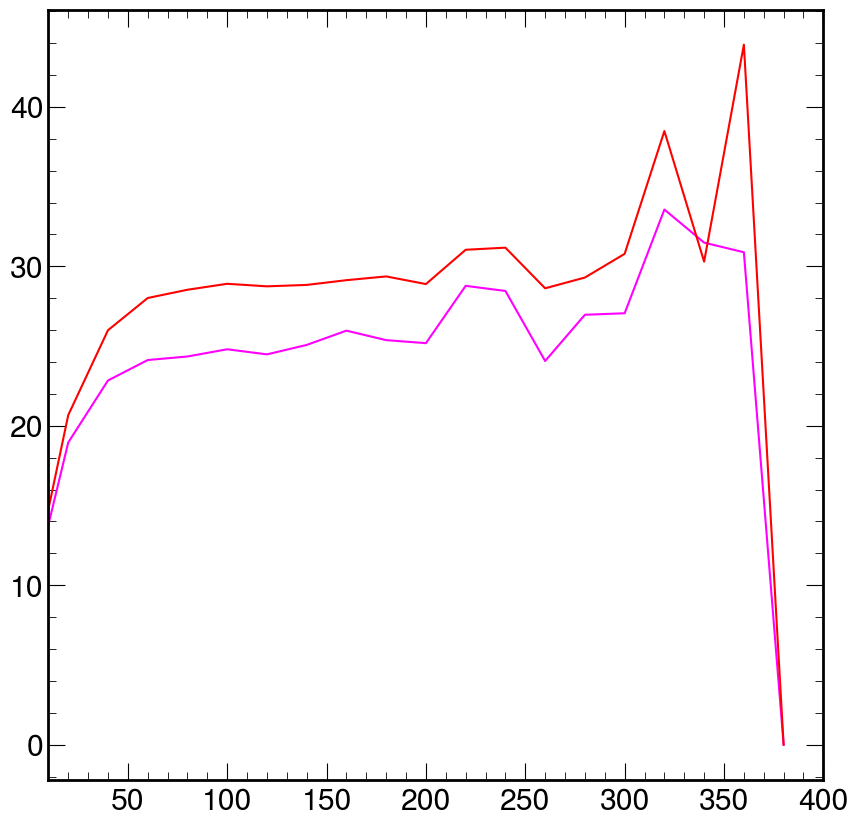

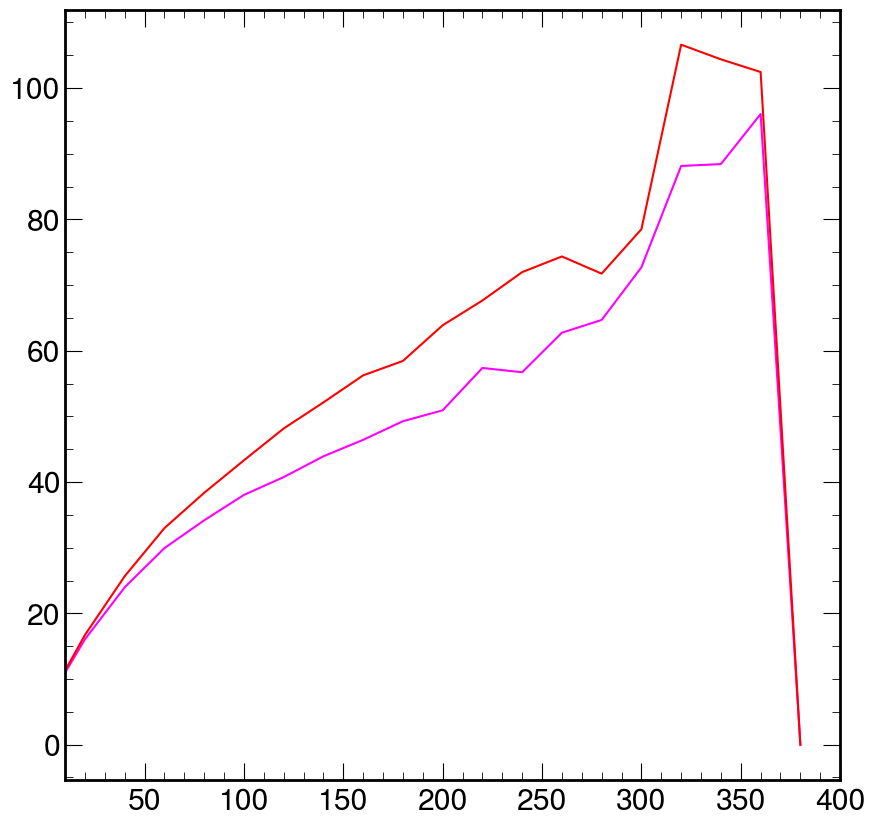

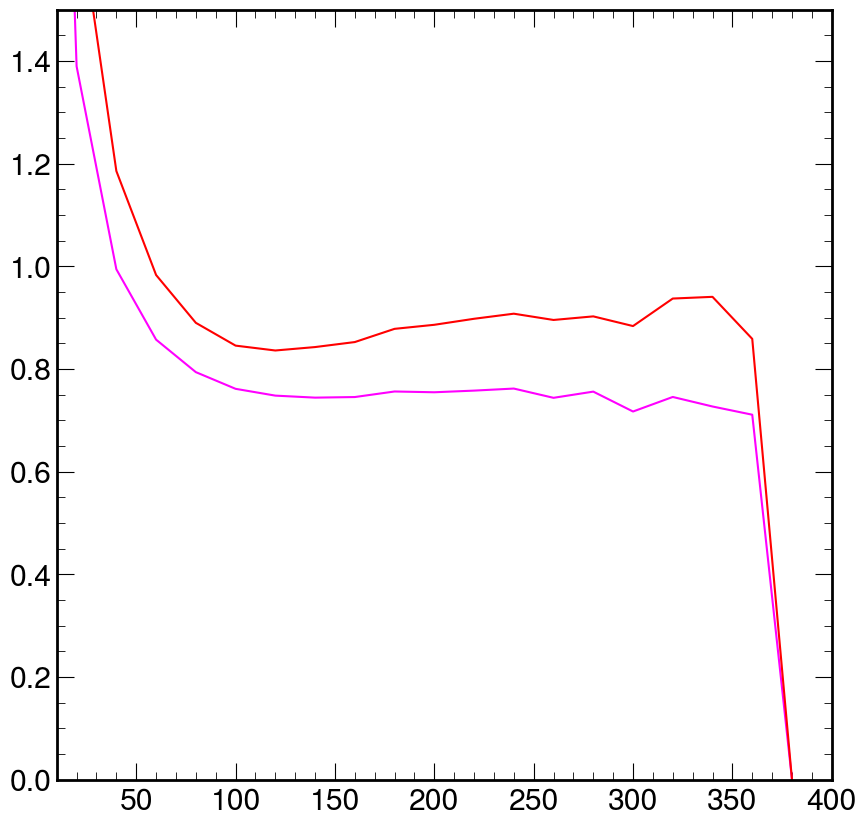

In [69]:
a = resolution_hists

for key in resolutions_arr:
    #plt.figure(1)
    #xx = a[key]['u_perp_resolution'][1][0:40]
    #yy = a[key]['u_perp_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(2)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    #plt.figure(3)
    #xx = a[key]['u_par_resolution'][1][0:40]
    #yy = a[key]['u_par_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(4)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    plt.figure(5)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    
    plt.xlim([10,400])
    plt.ylim([0,1.5])
    


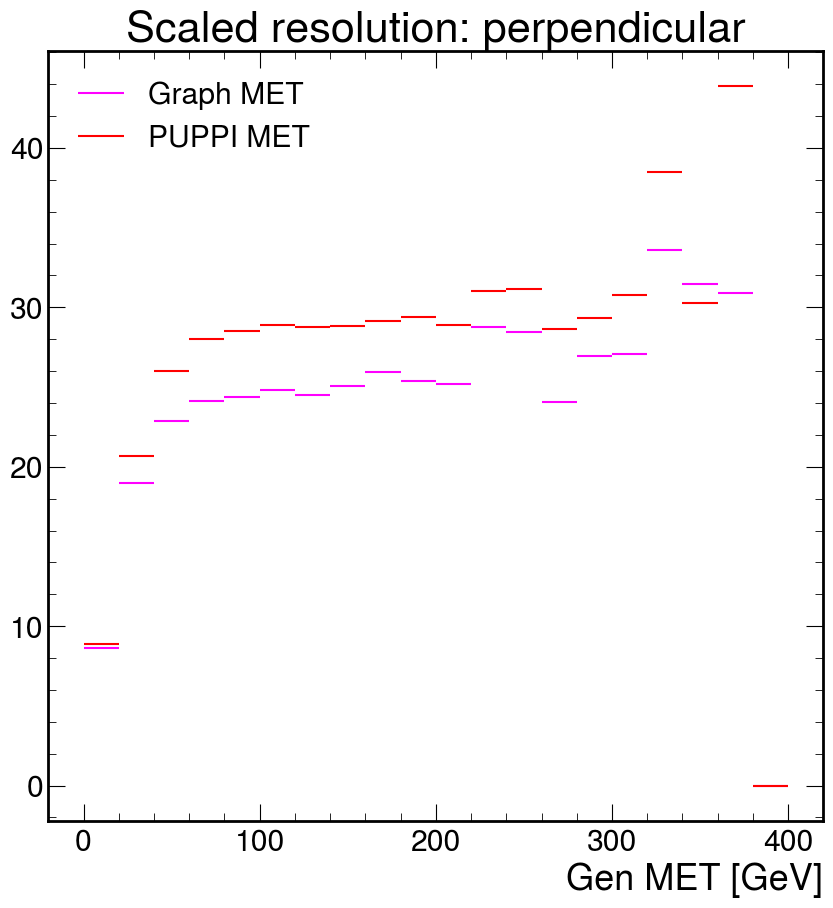

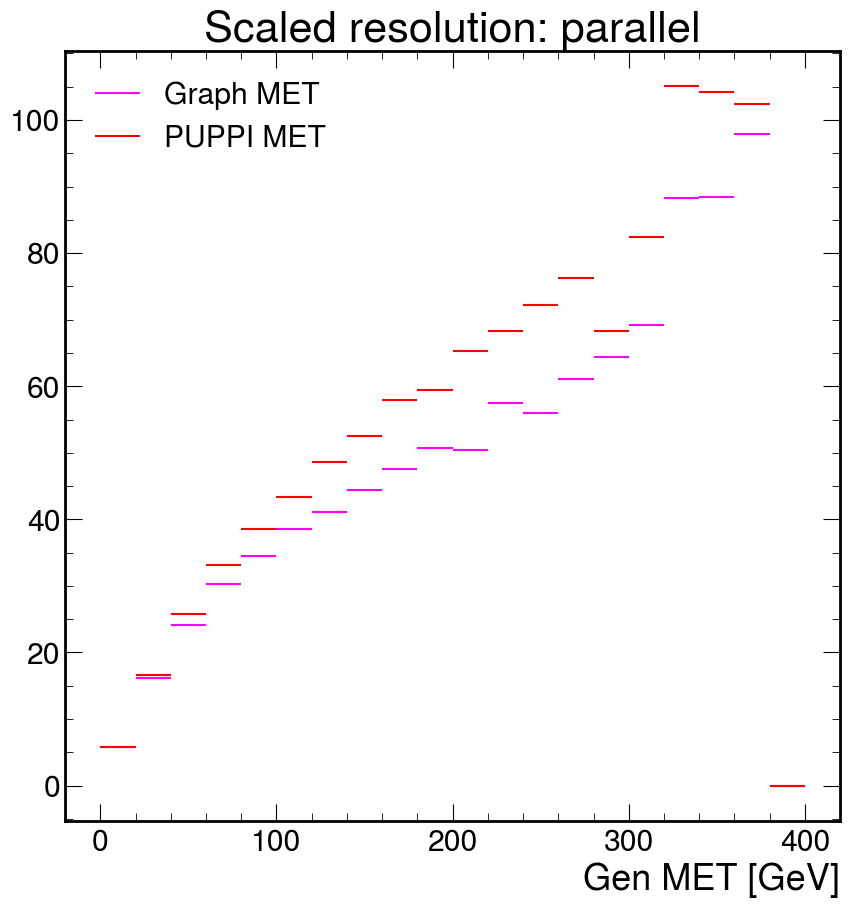

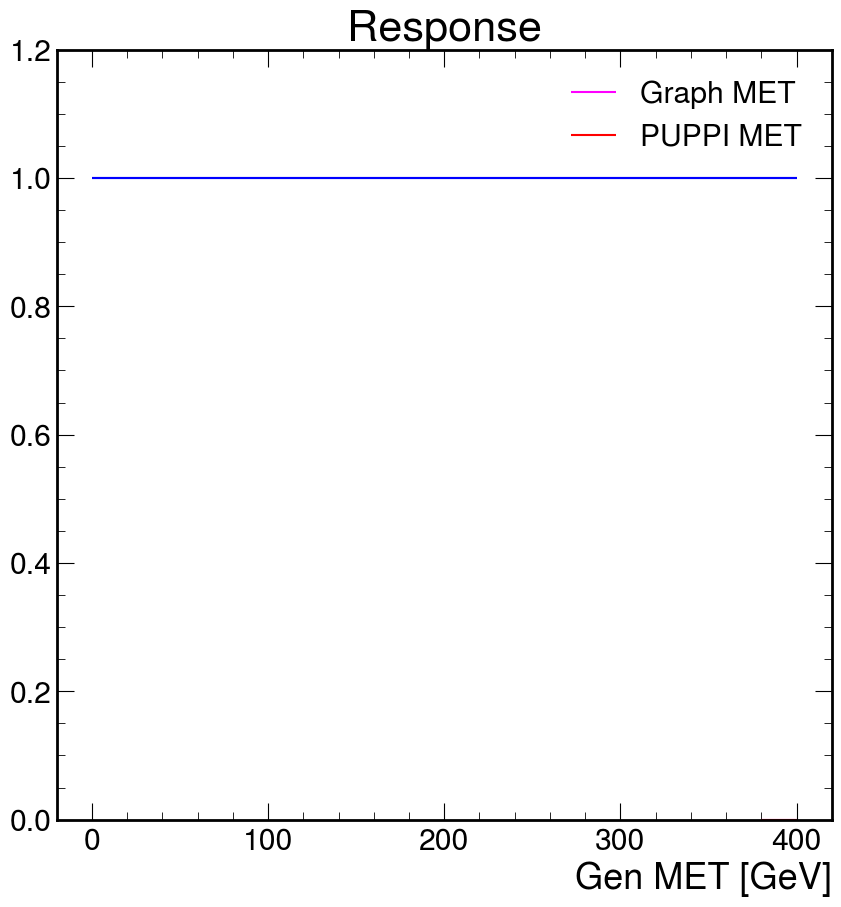

In [57]:
for key in resolutions_arr:
    # perp resolution scaled
    plt.figure(1)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: perpendicular')
    
    # parallel resolution scaled
    plt.figure(2)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]

    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: parallel')
    
    # response (using quantile)
    plt.figure(3)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')

    #plt.xlim([10,400])
    plt.ylim([0,1.2])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response')


In [70]:
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

#truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))

gen_MET = []
ml_MET = []
puppi_MET = []

for i in range(len(binnings)-1):
    mask_genMET = (genMET >= binnings[i]) & (genMET < binnings[i+1])
    
    idx_event = np.where(mask_genMET)
    
    gen_MET.append(genMET[idx_event])
    ml_MET.append(MET[idx_event])
    puppi_MET.append(puppiMET[idx_event])

In [71]:
binnings

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])

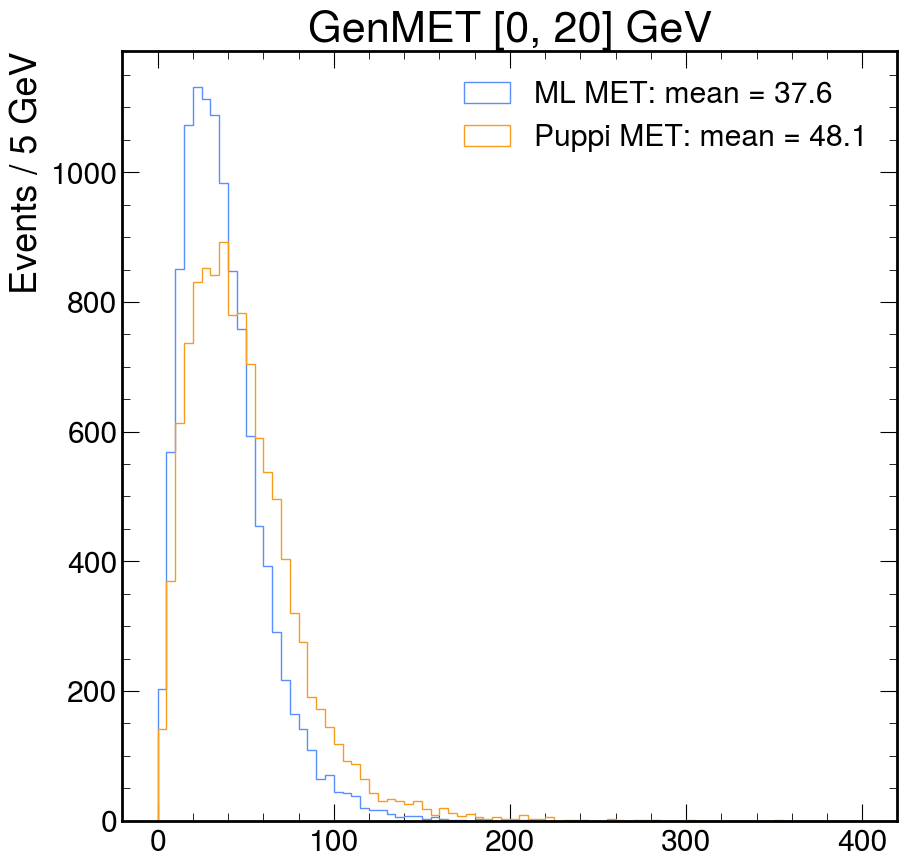

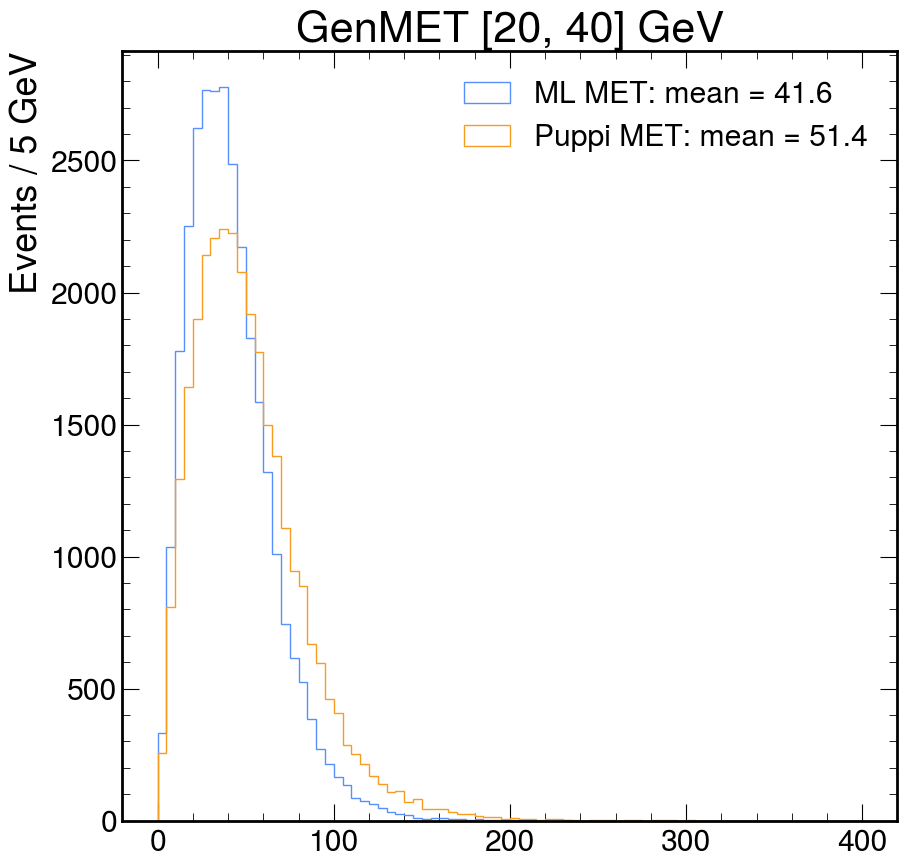

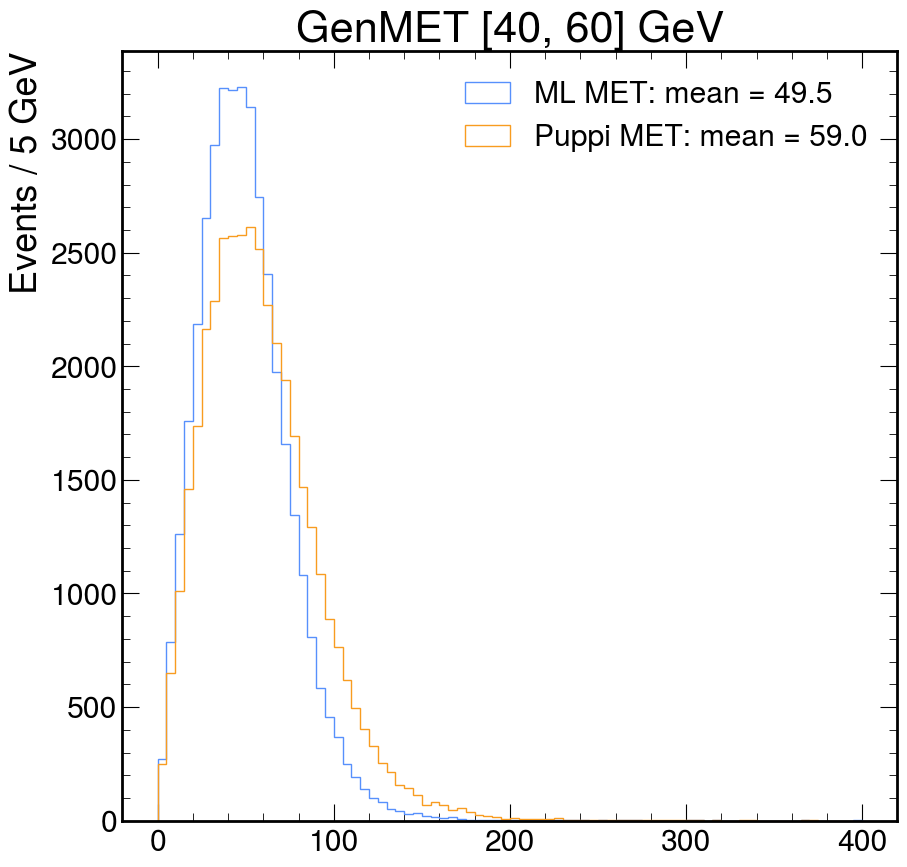

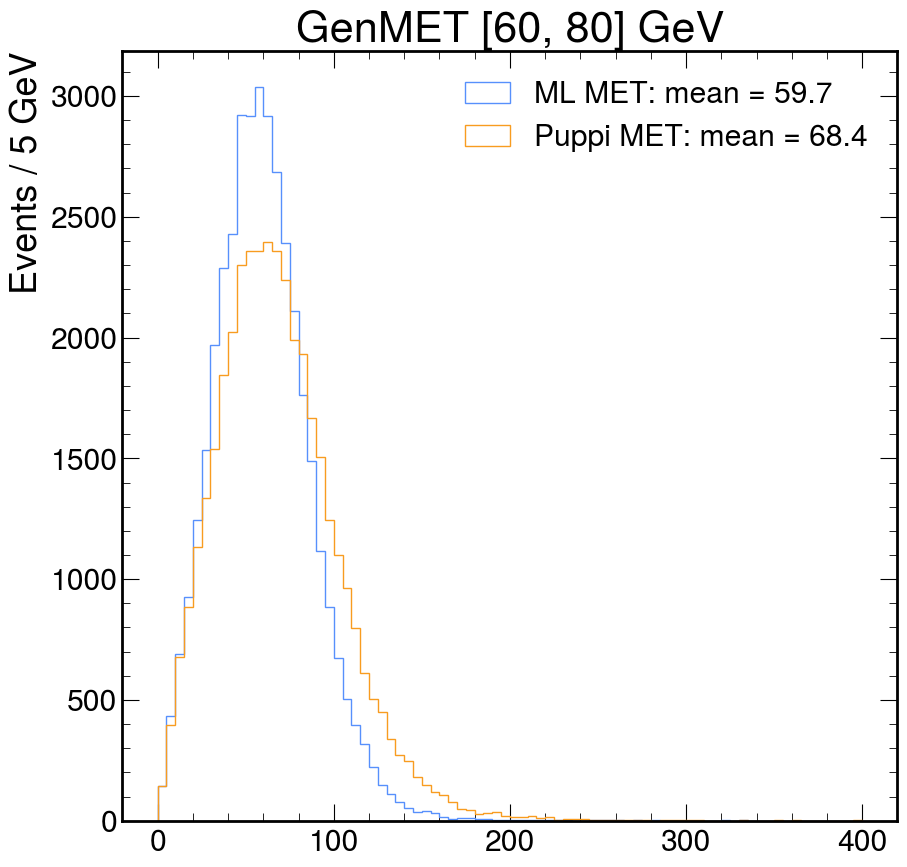

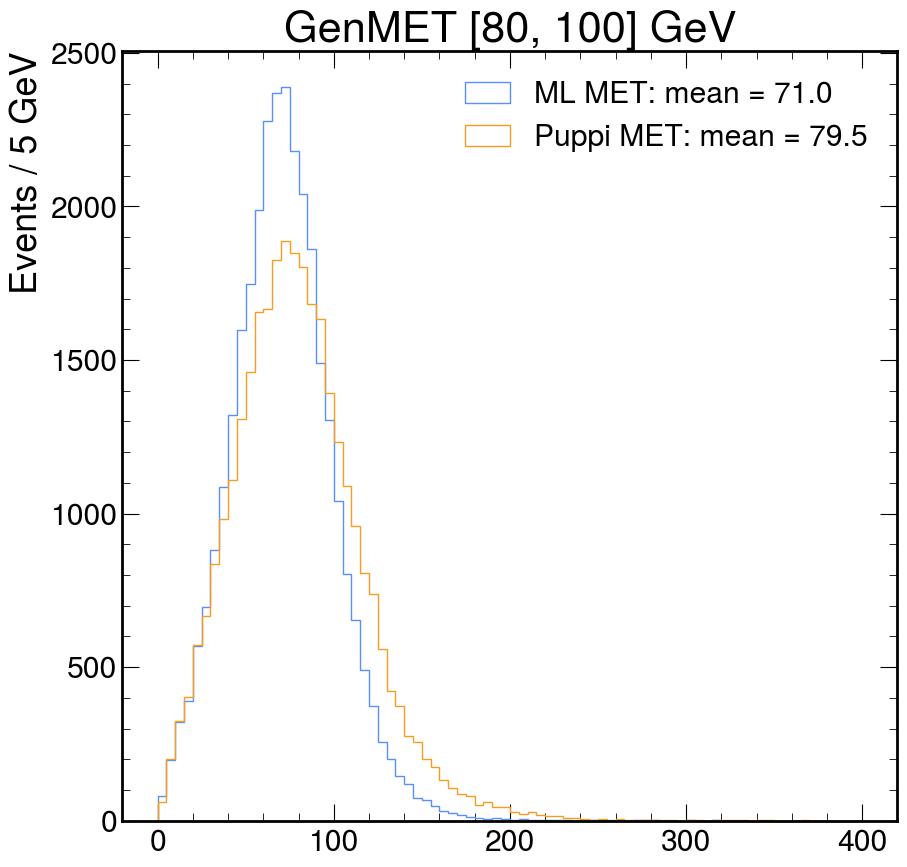

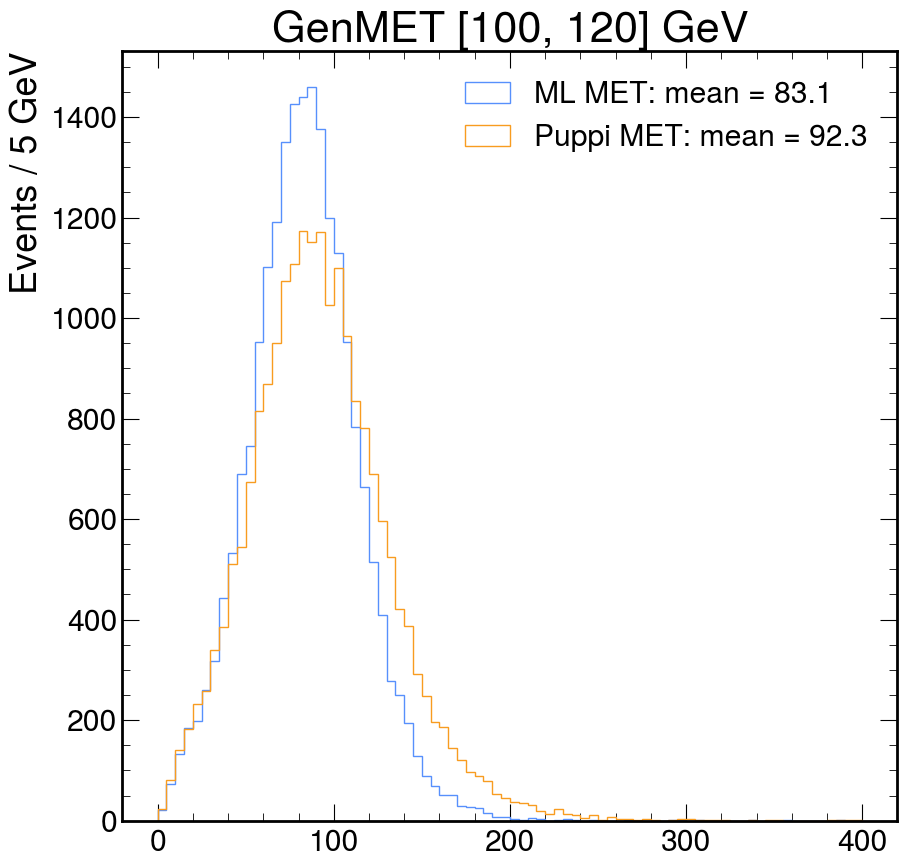

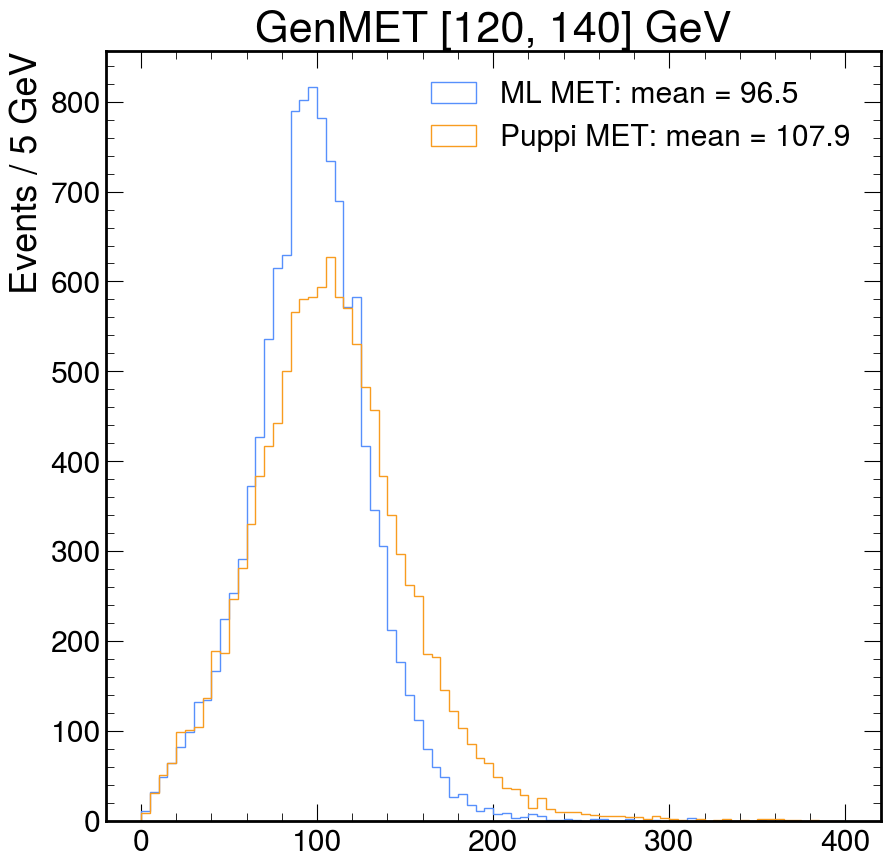

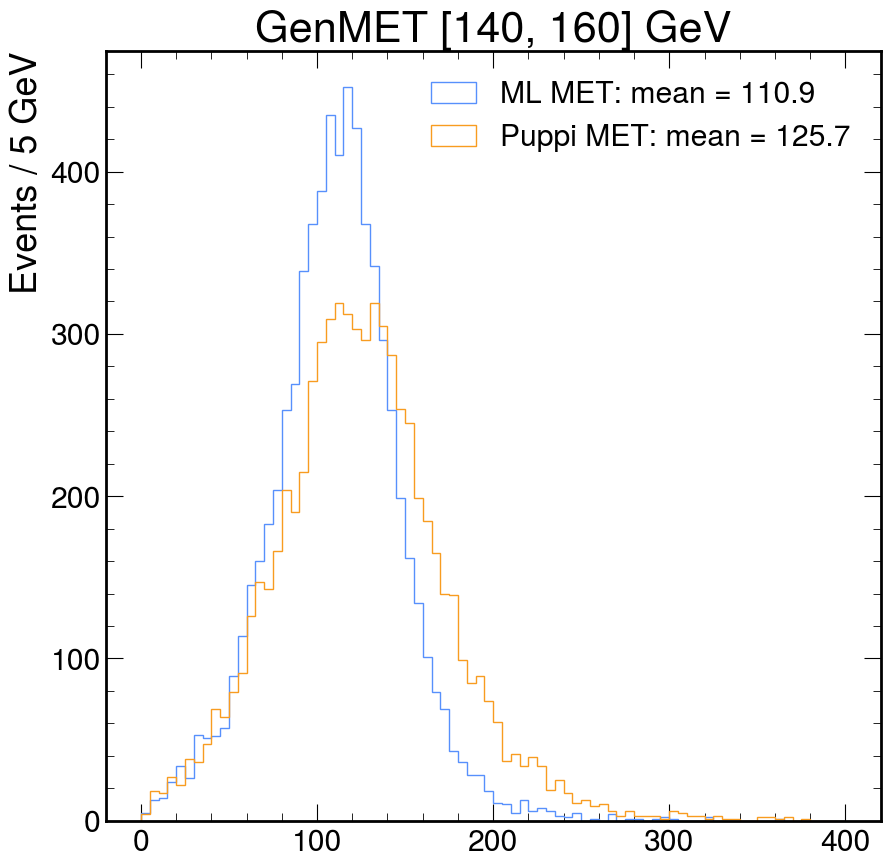

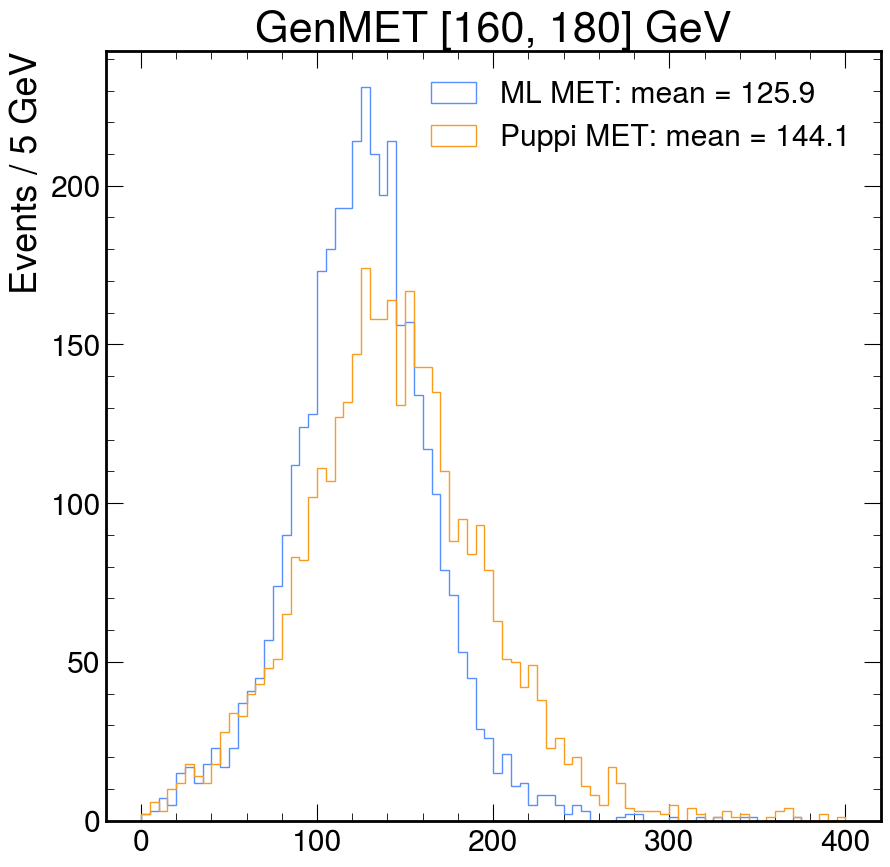

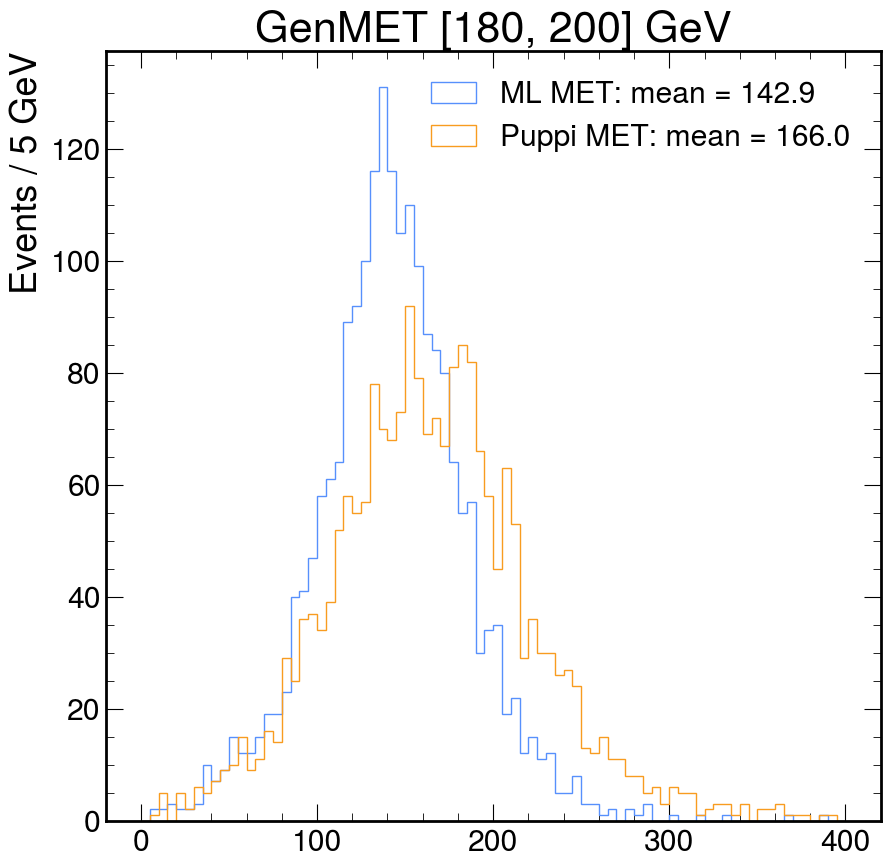

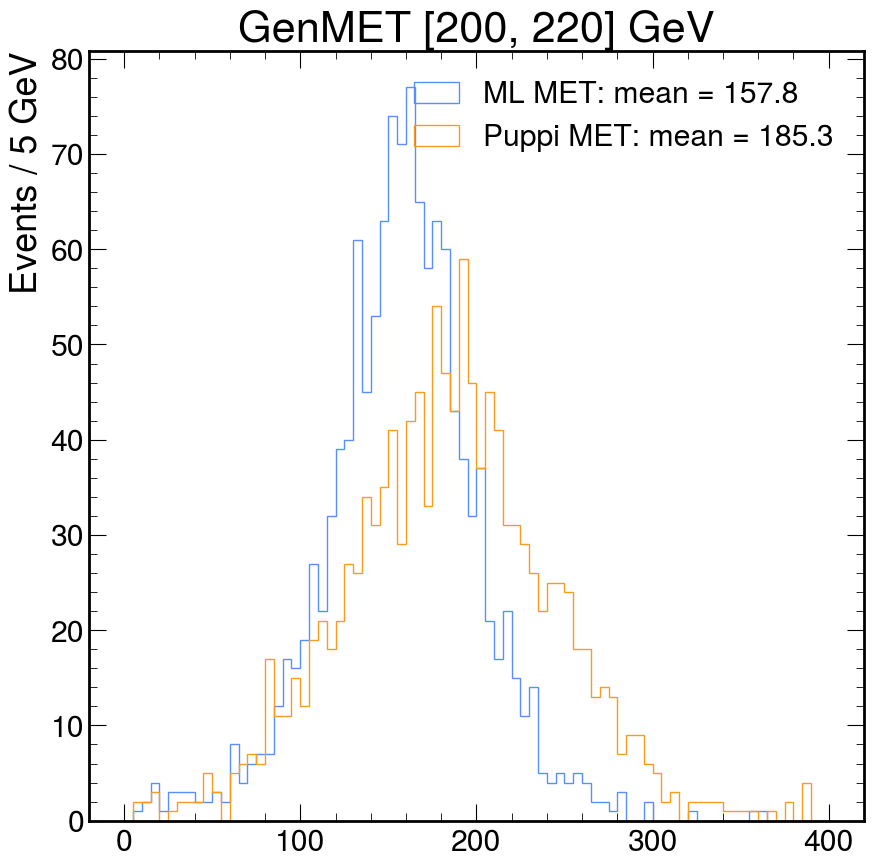

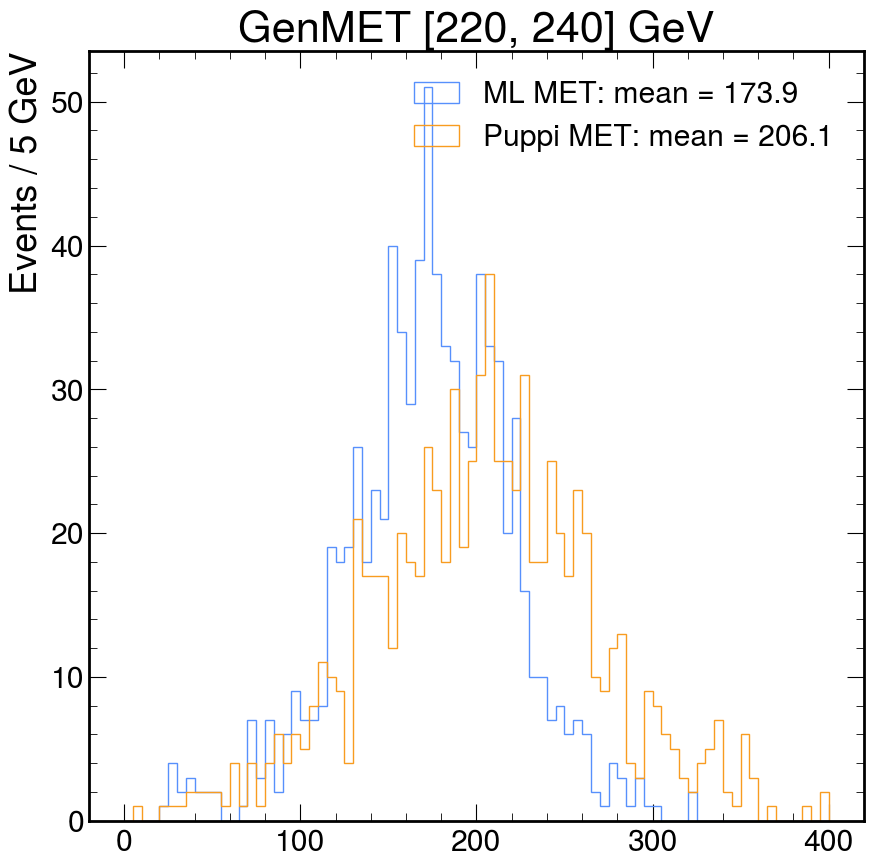

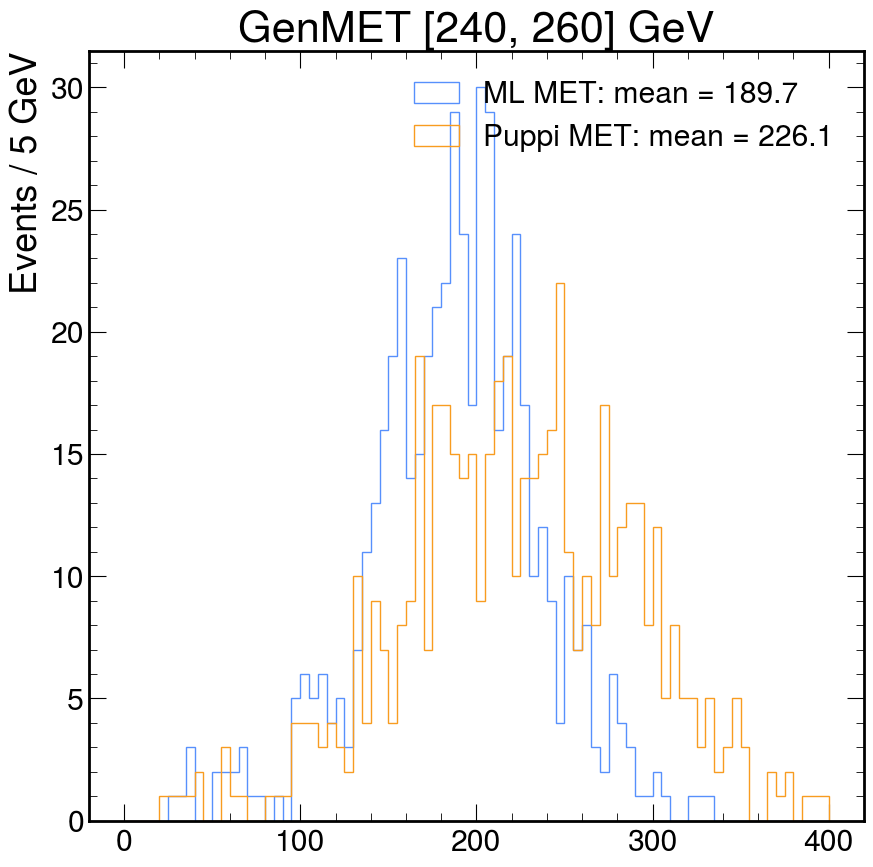

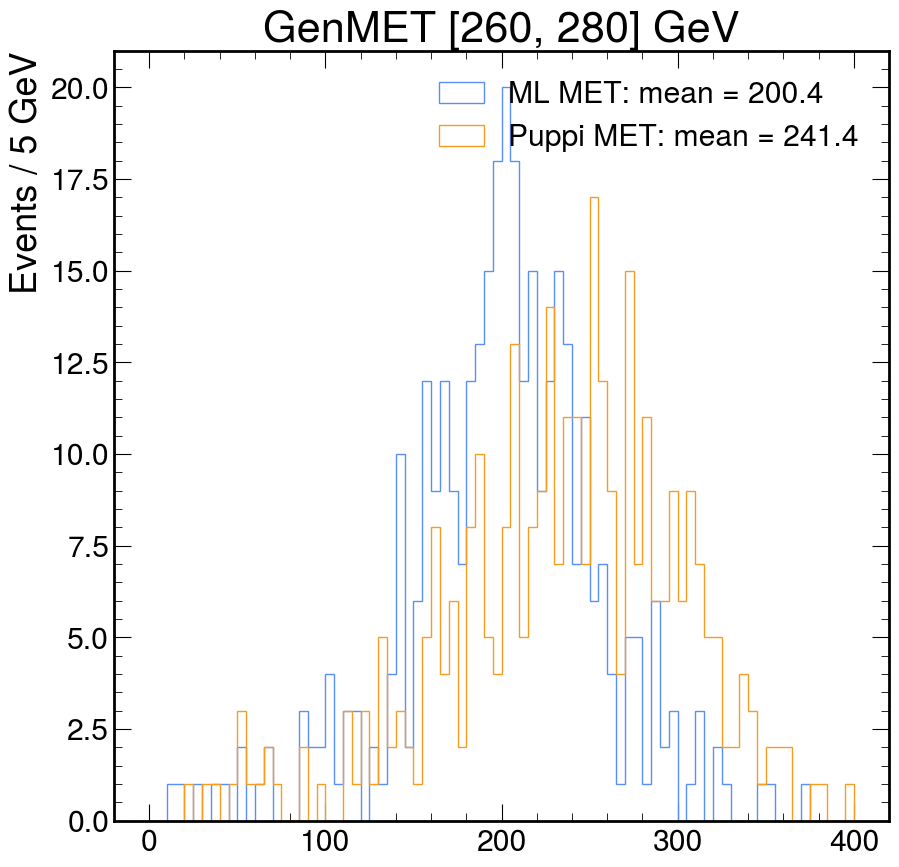

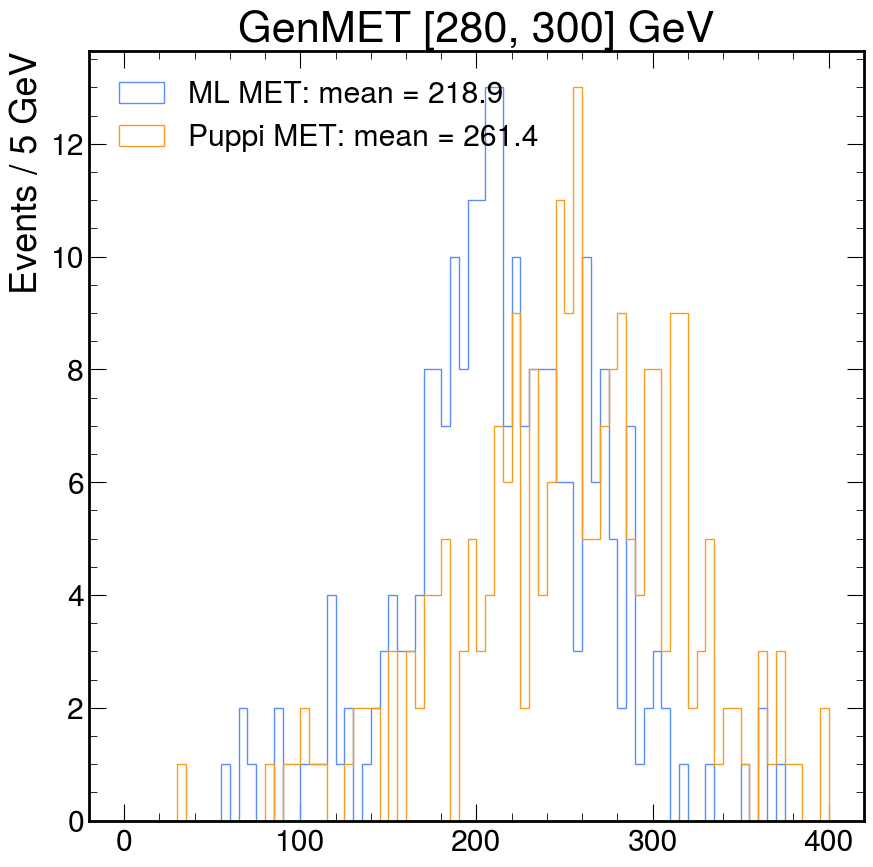

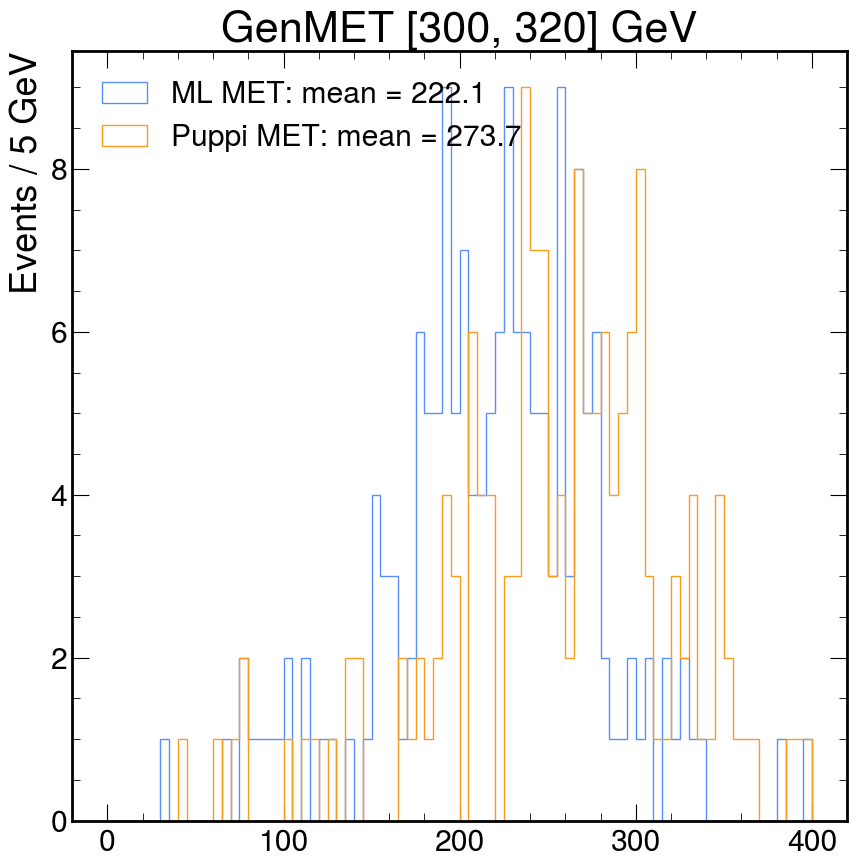

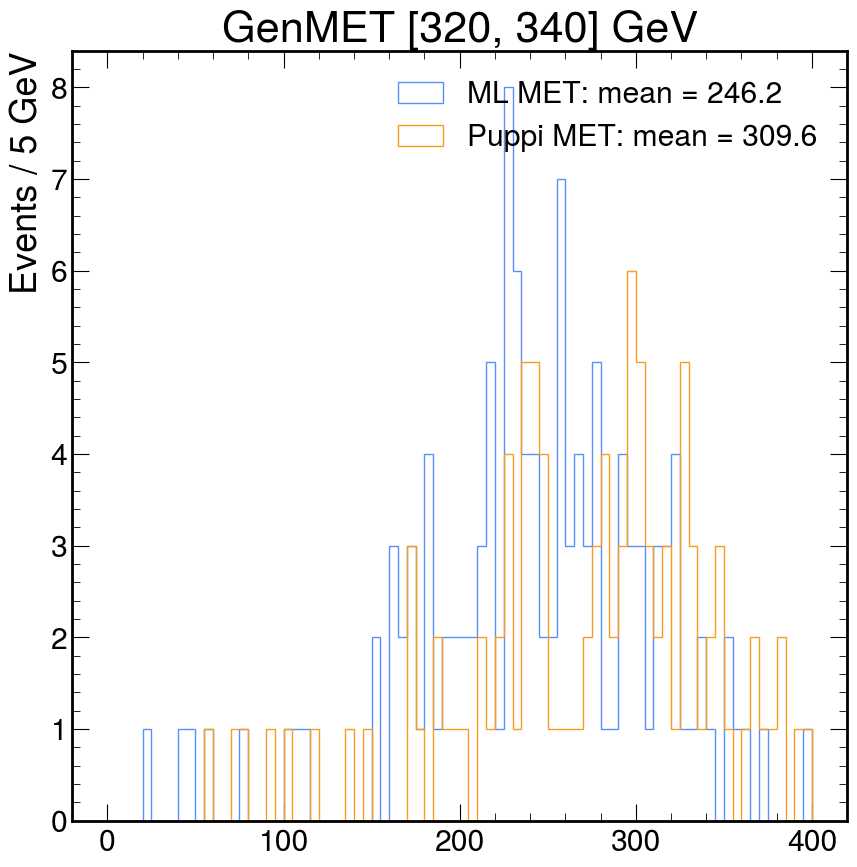

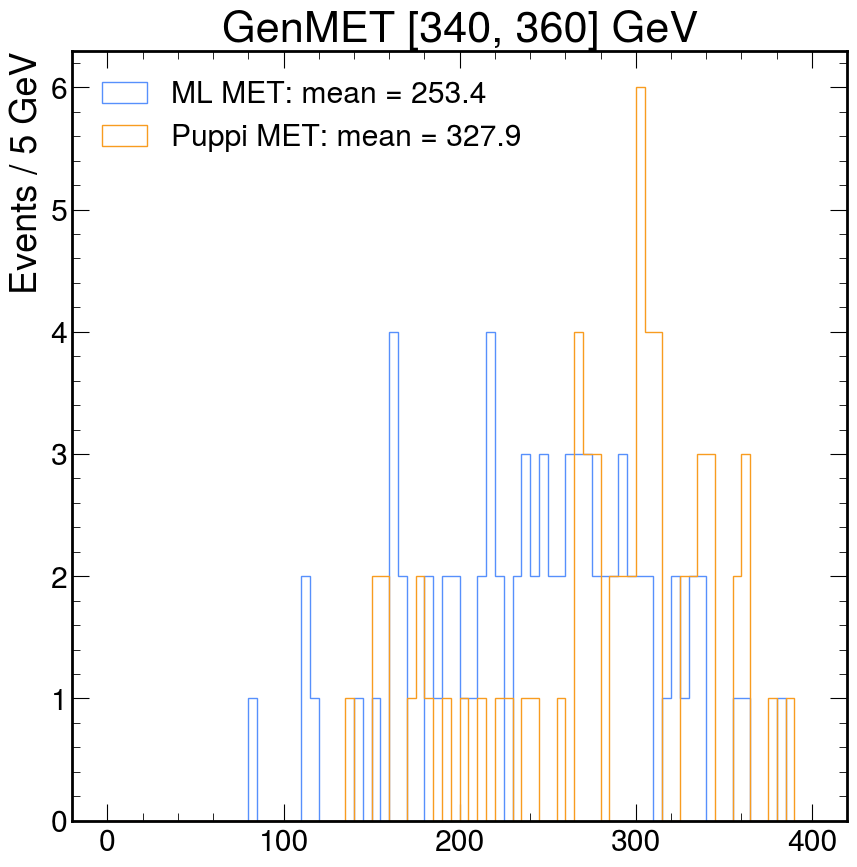

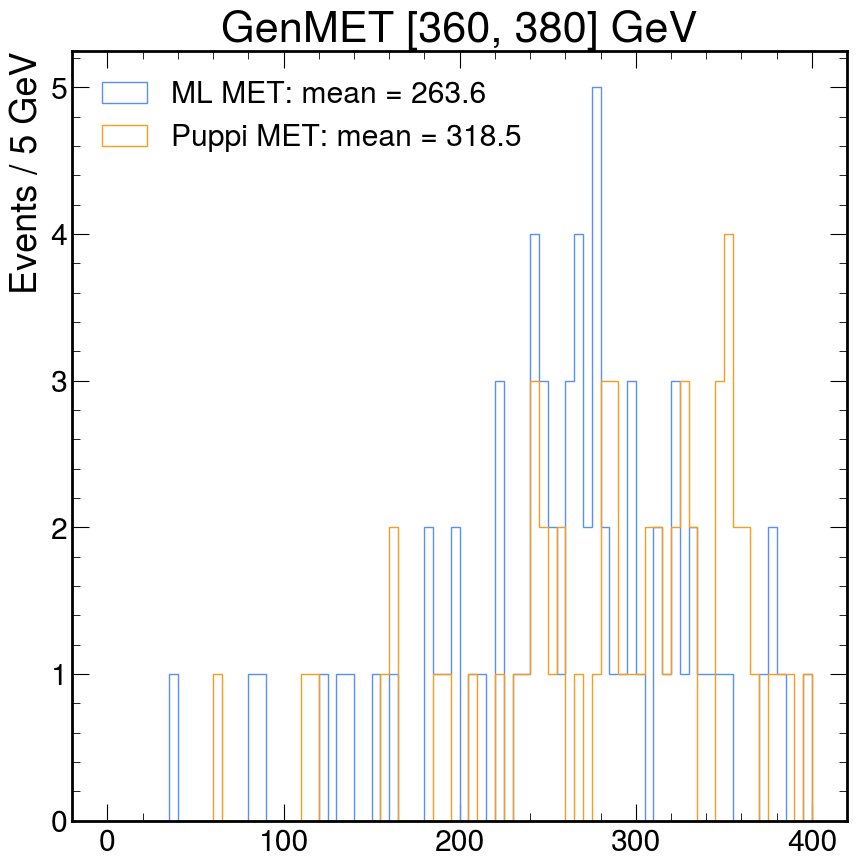

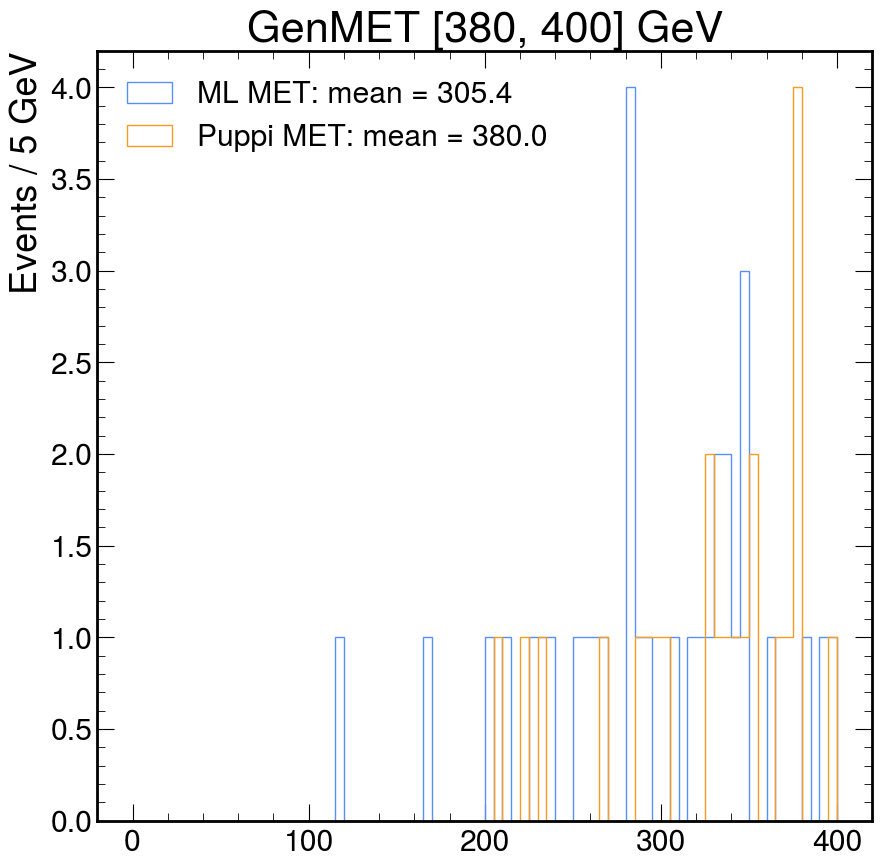

In [72]:
hist_bins = np.linspace(0, 400, num=80+1)

bin_i = 0

for bin_i in range(len(ml_MET)):
    plt.figure()
    
    plt.hist(ml_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'ML MET: mean = {ml_MET[bin_i].mean():.1f}')
    #plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=True, label='Gen MET')
    plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')


    plt.ylabel('Events / 5 GeV')

    plt.title(f'GenMET [{binnings[bin_i]:.0f}, {binnings[bin_i+1]:.0f}] GeV')
    plt.legend()
    
    plt.show()

In [73]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(MET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(MET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(MET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))


Text(0.5, 1.0, 'Response correction')

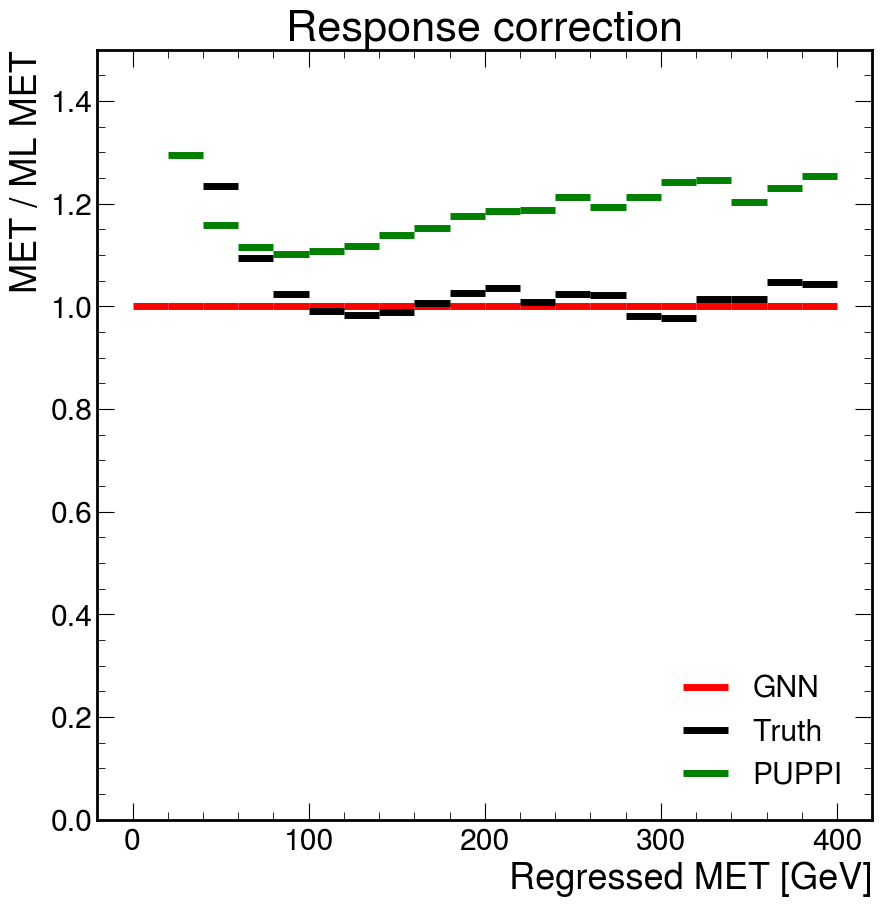

In [74]:
plt.hlines(ml_means/ml_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(truth_means/ml_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(puppi_means/ml_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.5)
plt.xlabel('Regressed MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / ML MET')

plt.title('Response correction')

Text(0.5, 1.0, 'Response')

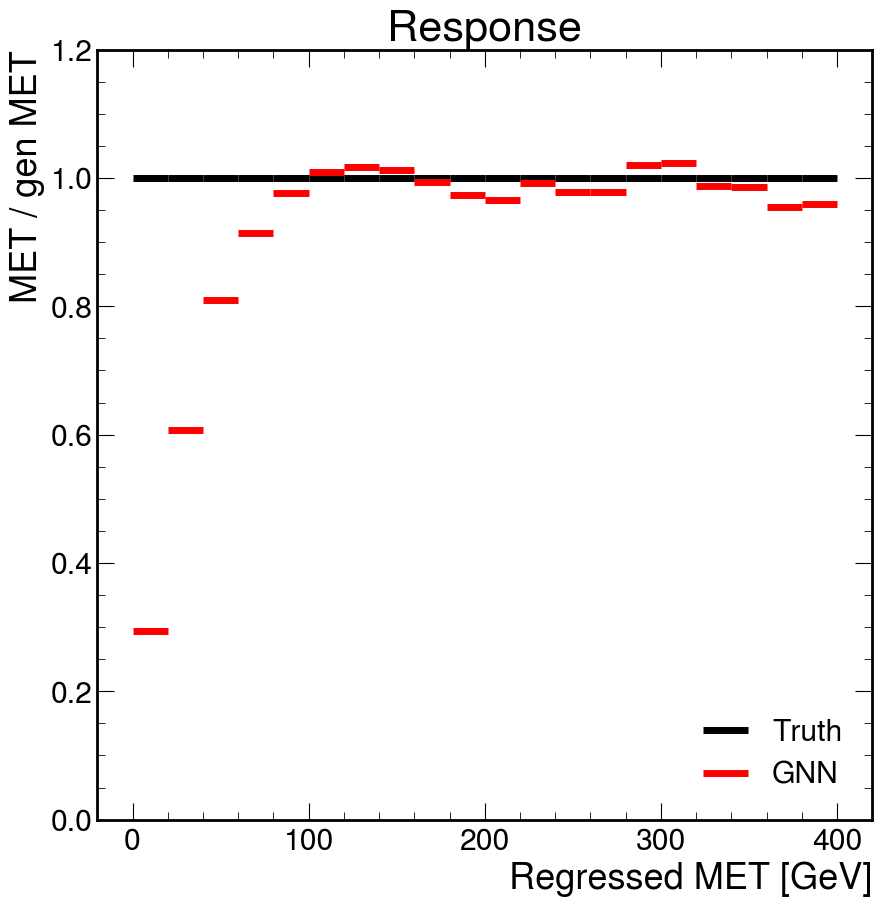

In [75]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
#plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
#               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Regressed MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / gen MET')

plt.title('Response')

In [76]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(puppiMET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(puppiMET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(puppiMET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))

# Take the mean for each bin
response = ml_means / truth_means

Text(0.5, 1.0, 'Response correction')

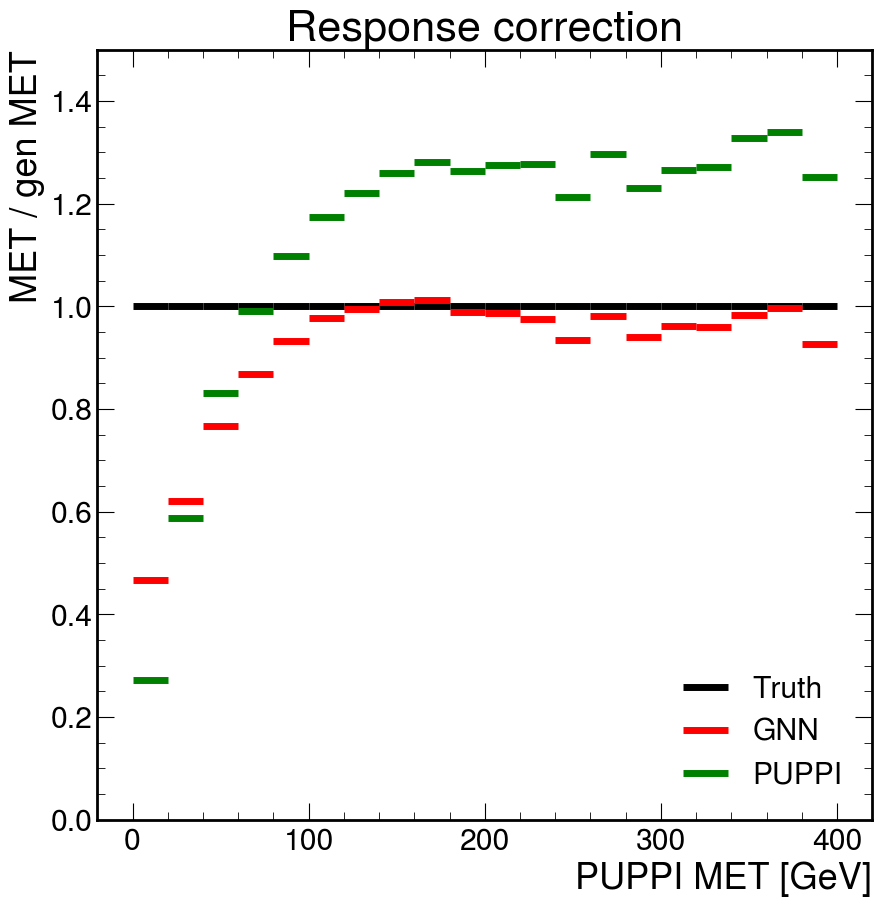

In [77]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.5)
plt.xlabel('PUPPI MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / gen MET')

plt.title('Response correction')

In [55]:
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

#truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))

gen_MET = []
ml_MET = []
puppi_MET = []

for i in range(len(binnings)-1):
    mask_mlMET = (MET >= binnings[i]) & (MET < binnings[i+1])
    
    idx_event = np.where(mask_mlMET)
    
    gen_MET.append(genMET[idx_event])
    ml_MET.append(MET[idx_event])
    puppi_MET.append(puppiMET[idx_event])

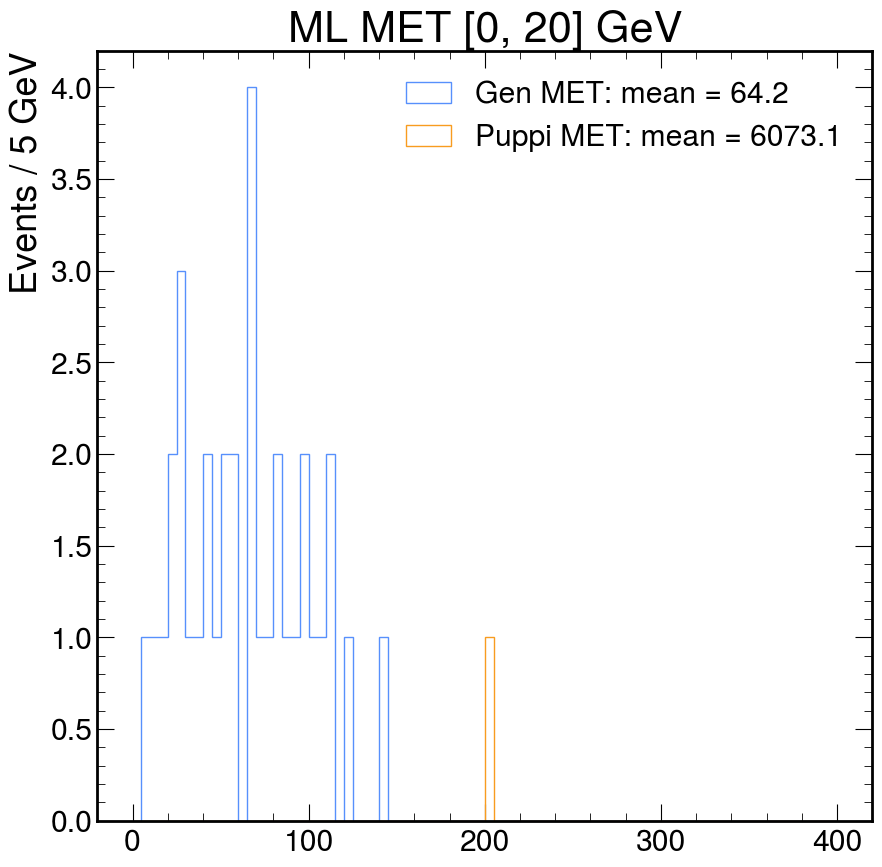

/tmp/user/13383/ipykernel_299598/2578207167.py:9: RuntimeWarning: Mean of empty slice.
  plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Gen MET: mean = {gen_MET[bin_i].mean():.1f}')
/export/home/phys/sdurgut/anaconda3/envs/deepmet5/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/user/13383/ipykernel_299598/2578207167.py:10: RuntimeWarning: Mean of empty slice.
  plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')


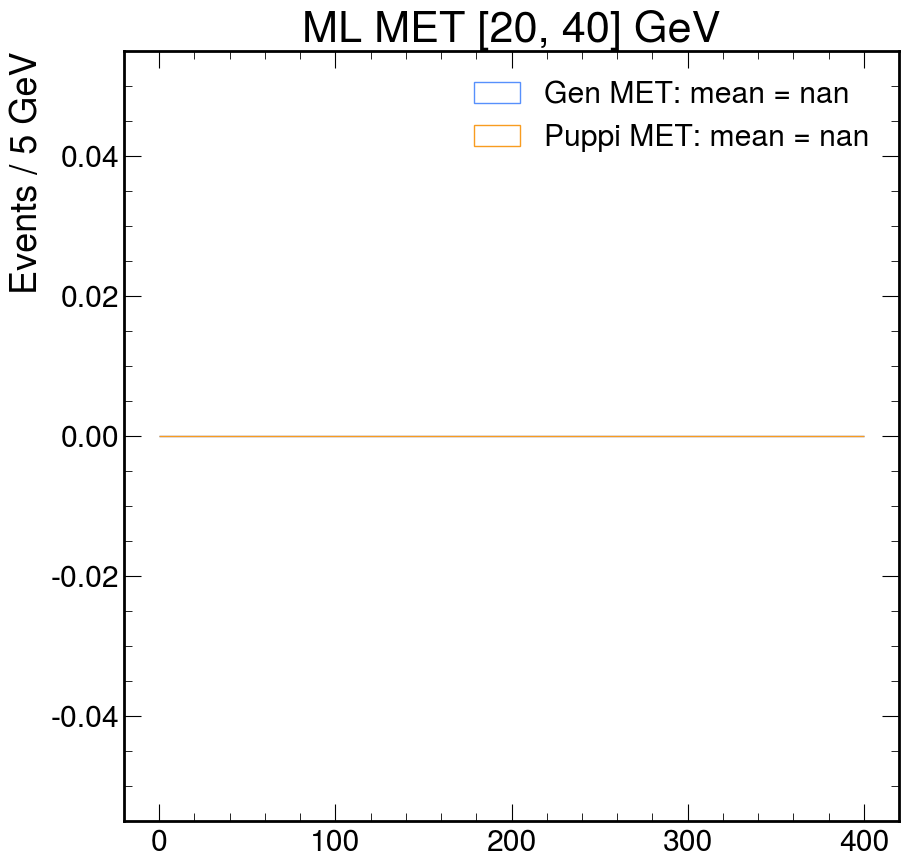

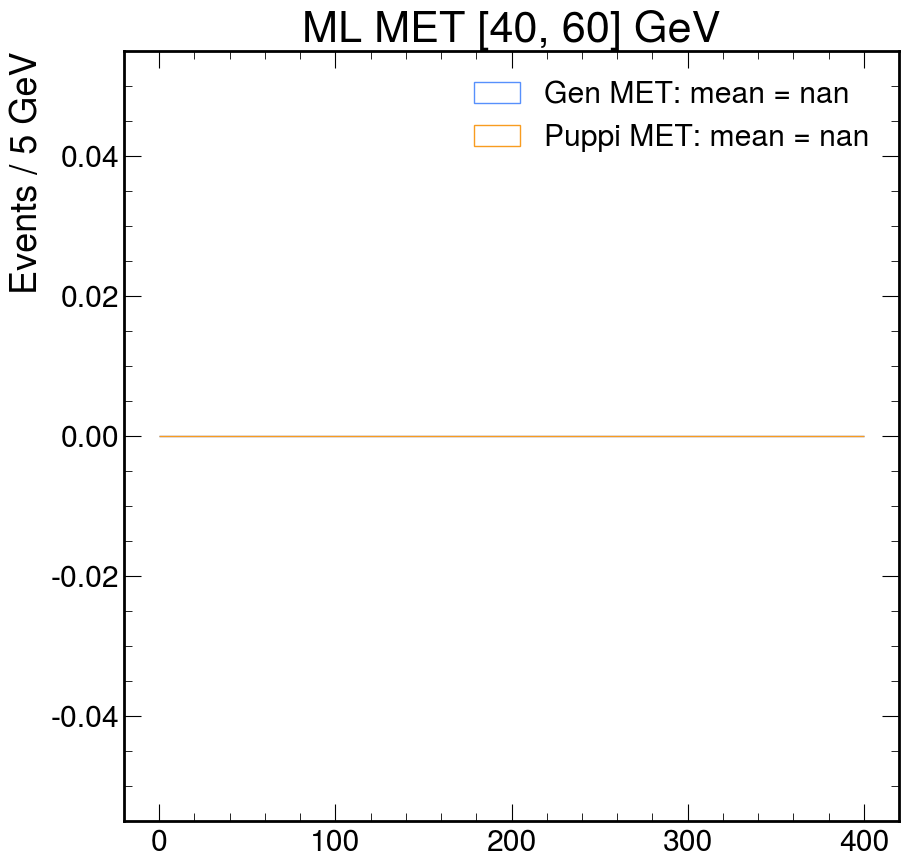

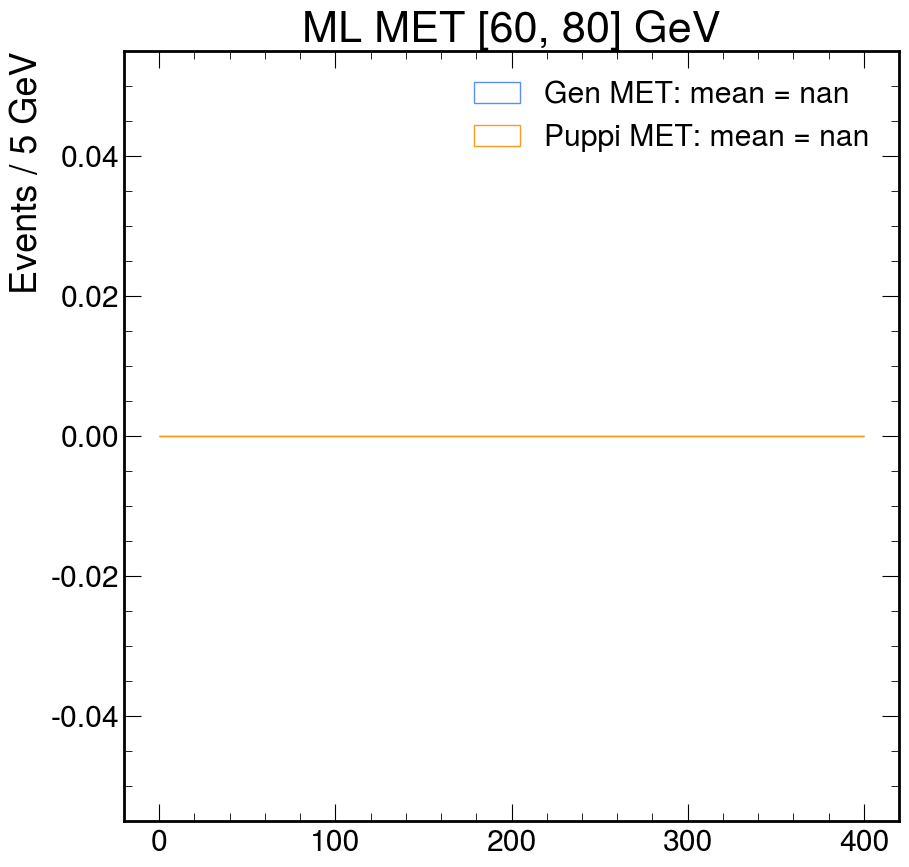

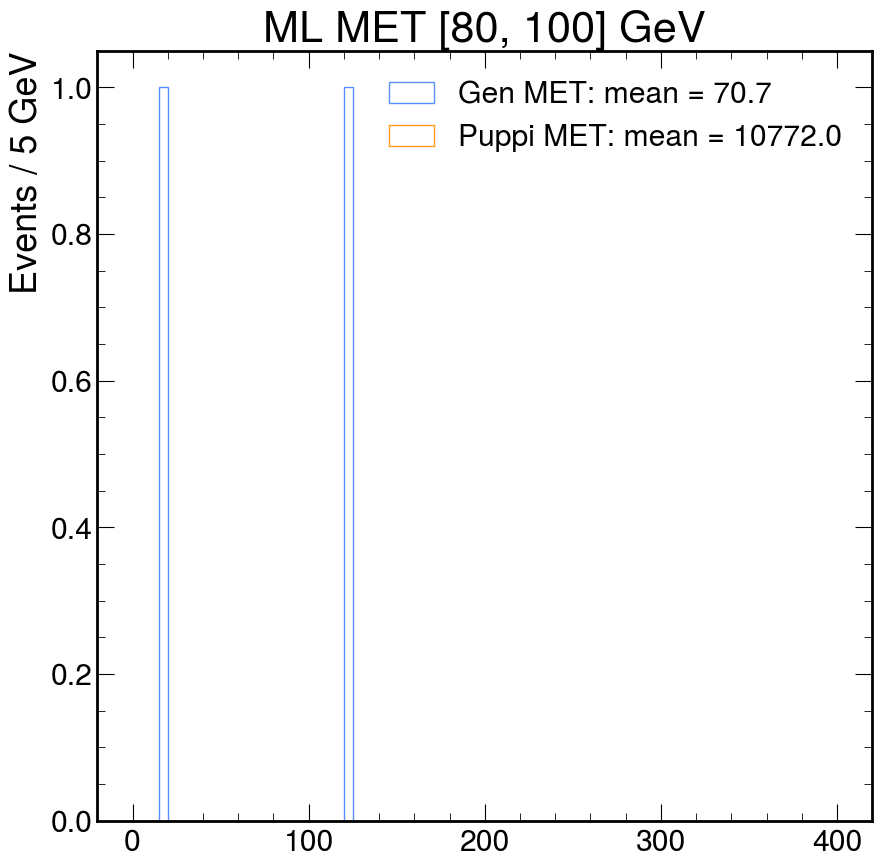

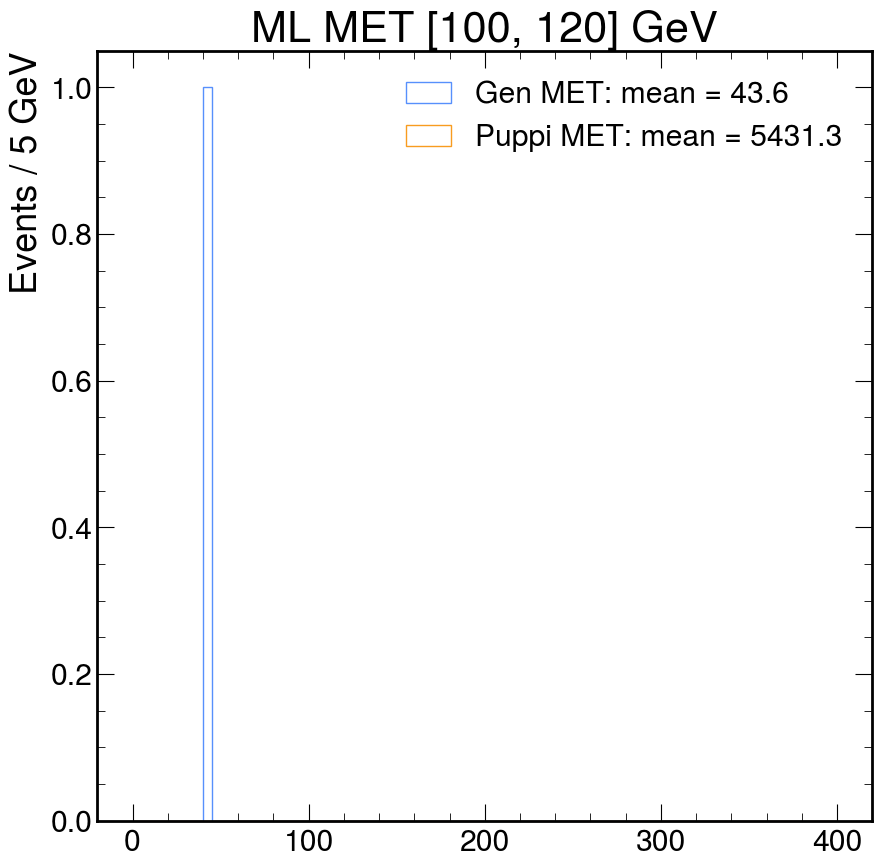

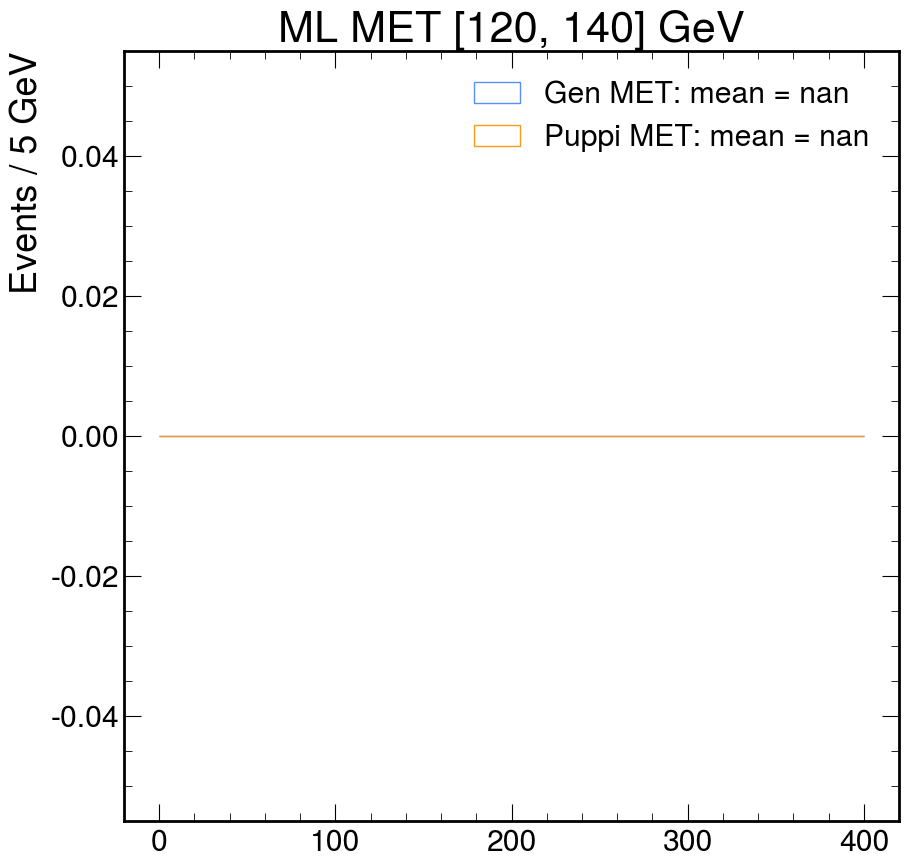

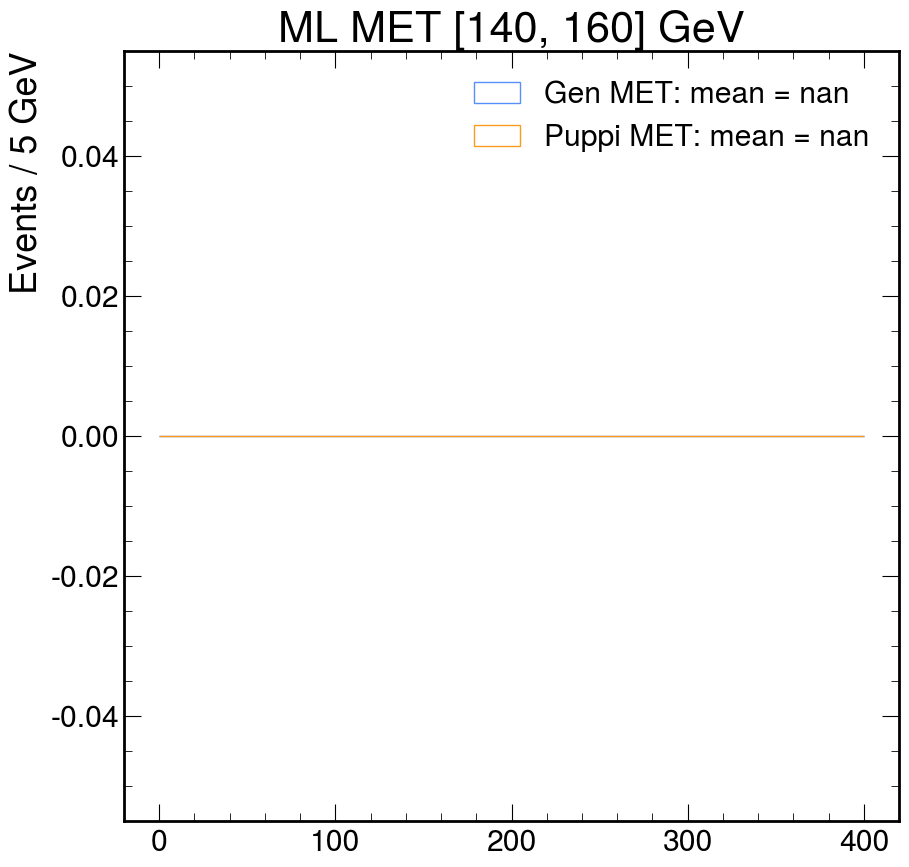

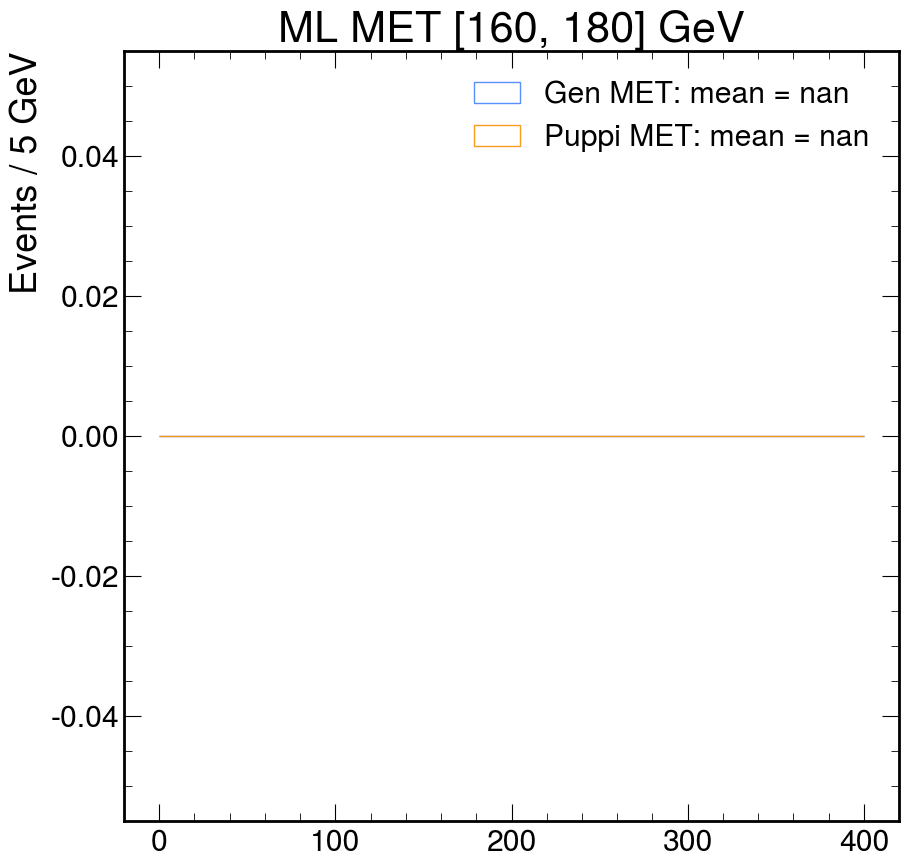

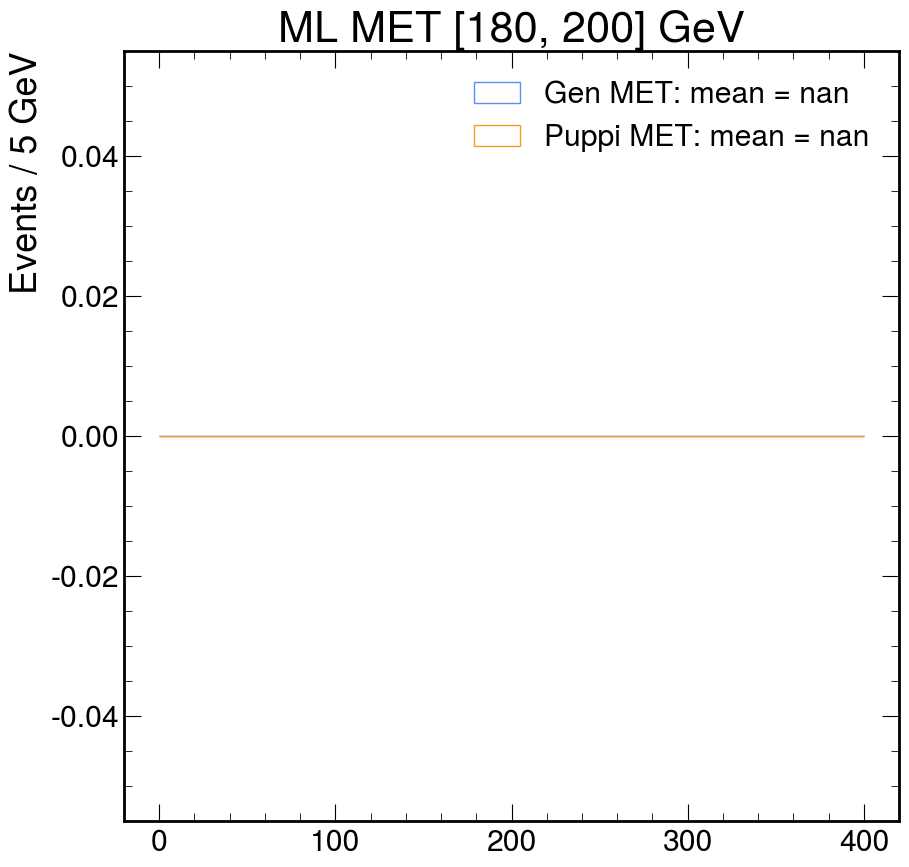

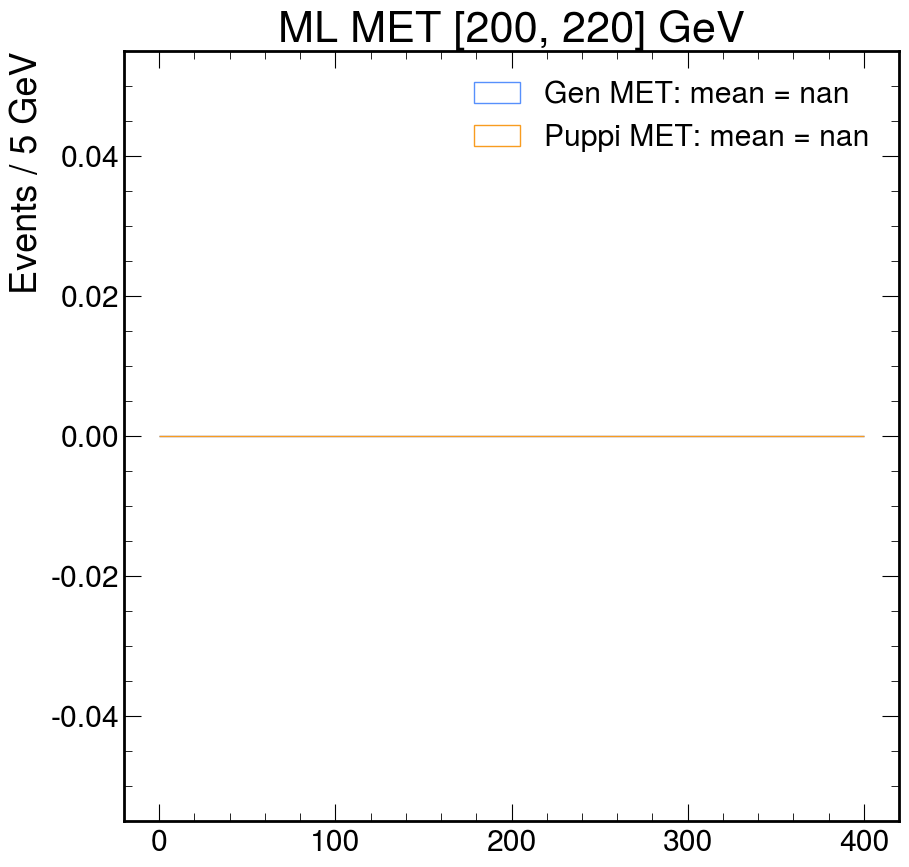

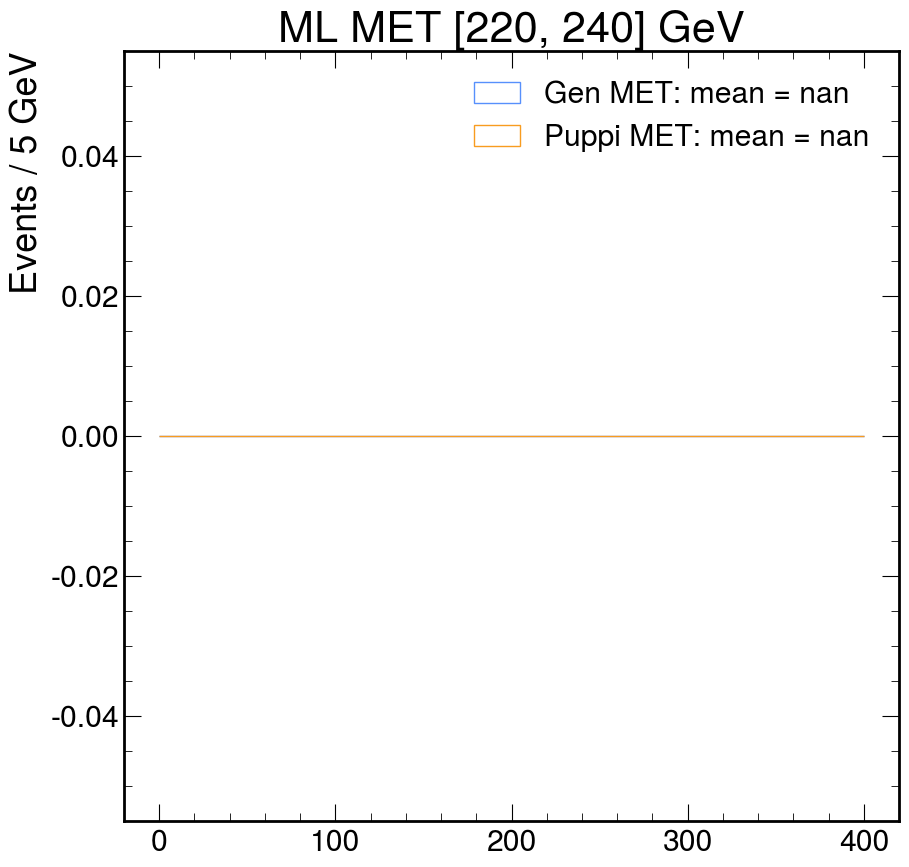

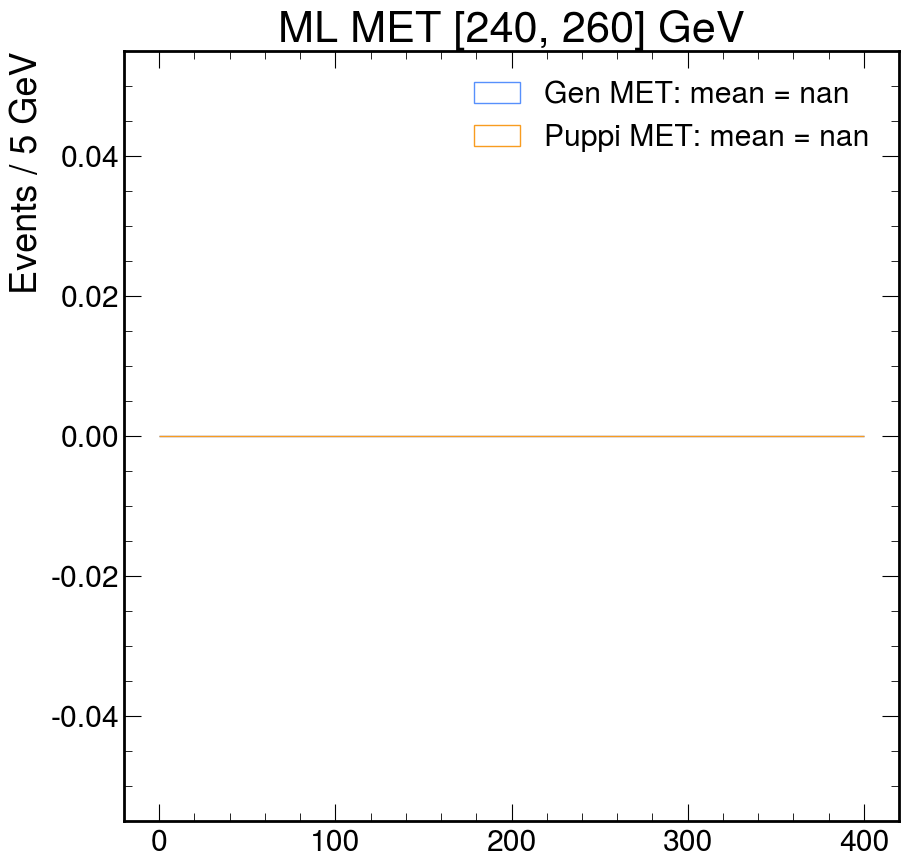

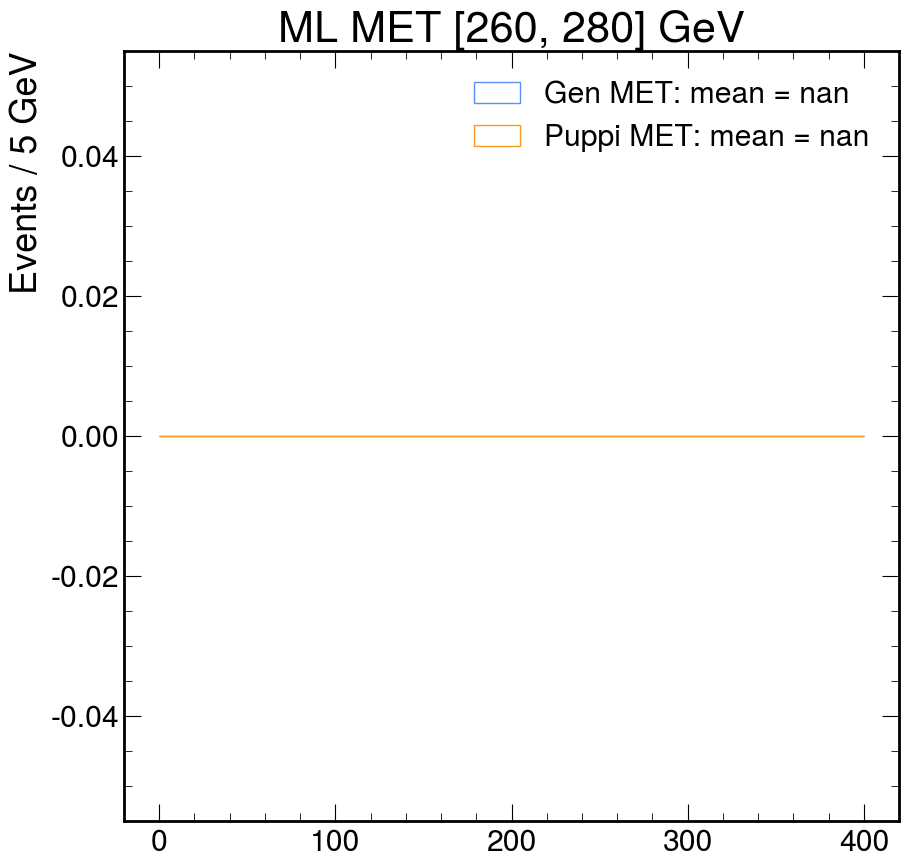

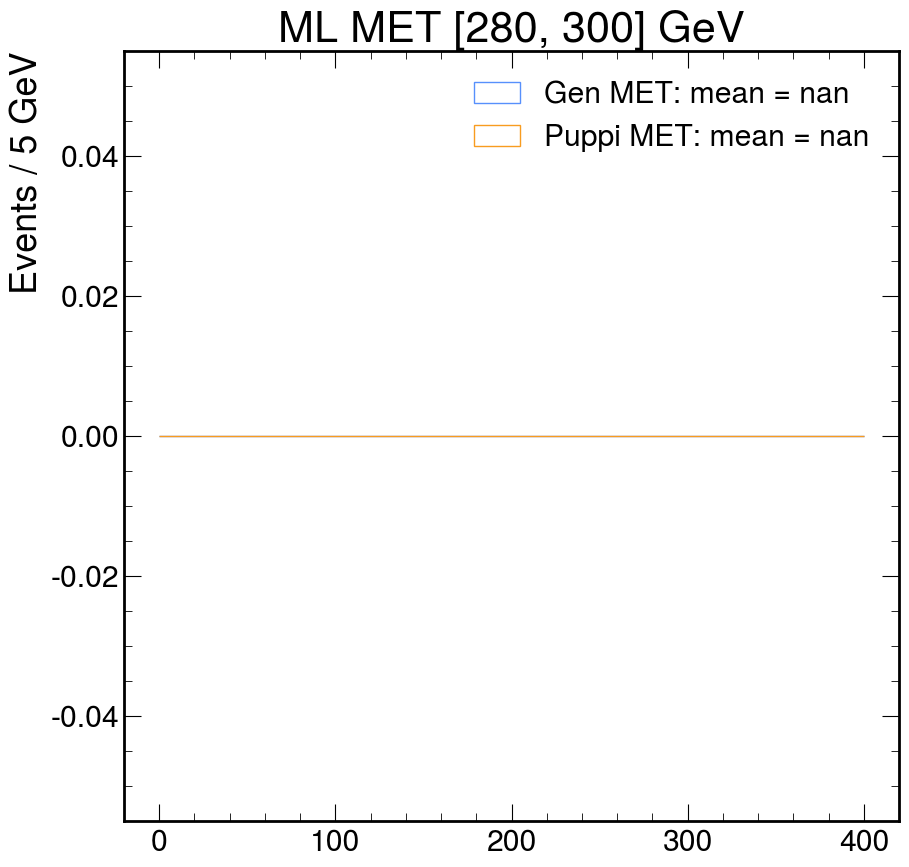

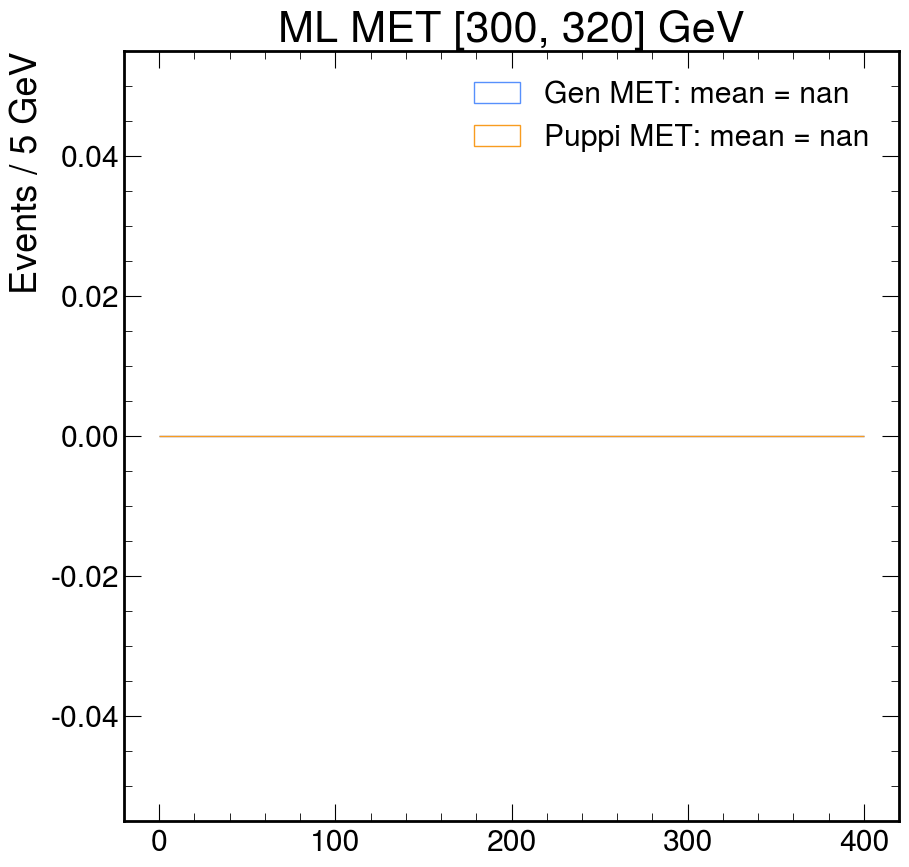

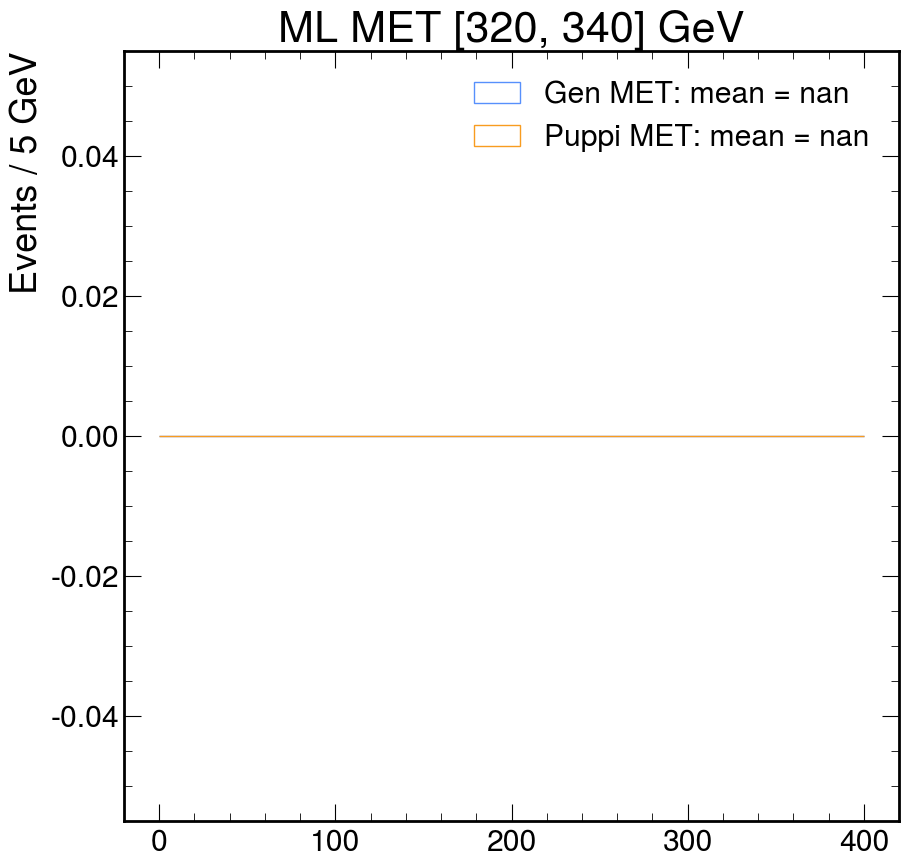

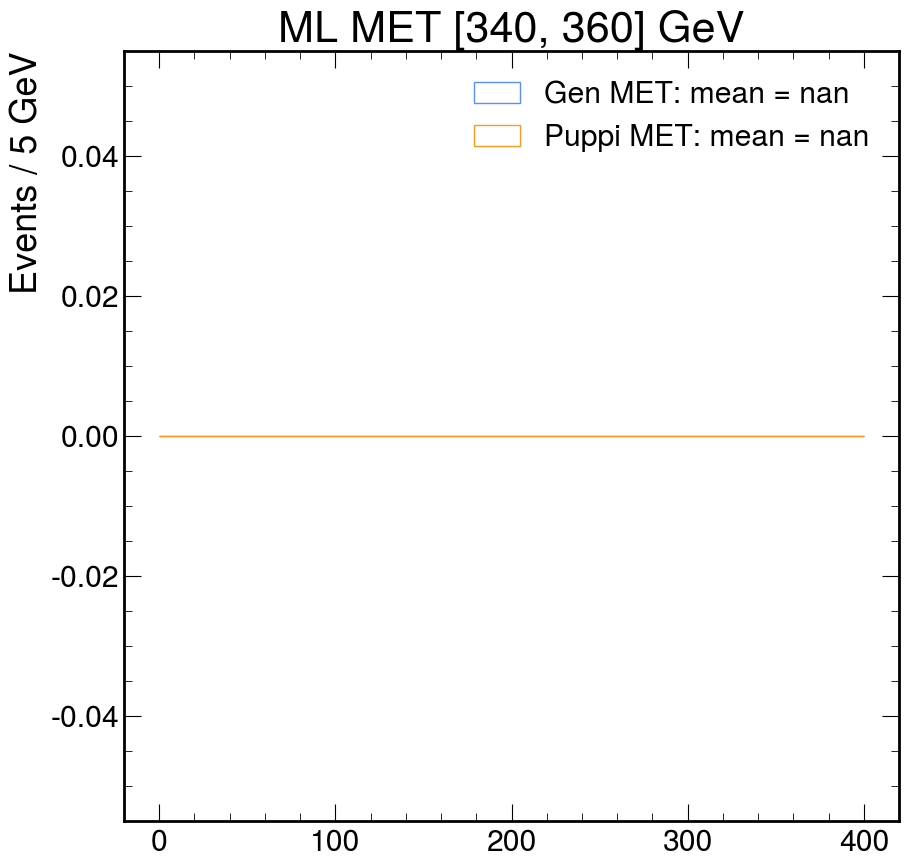

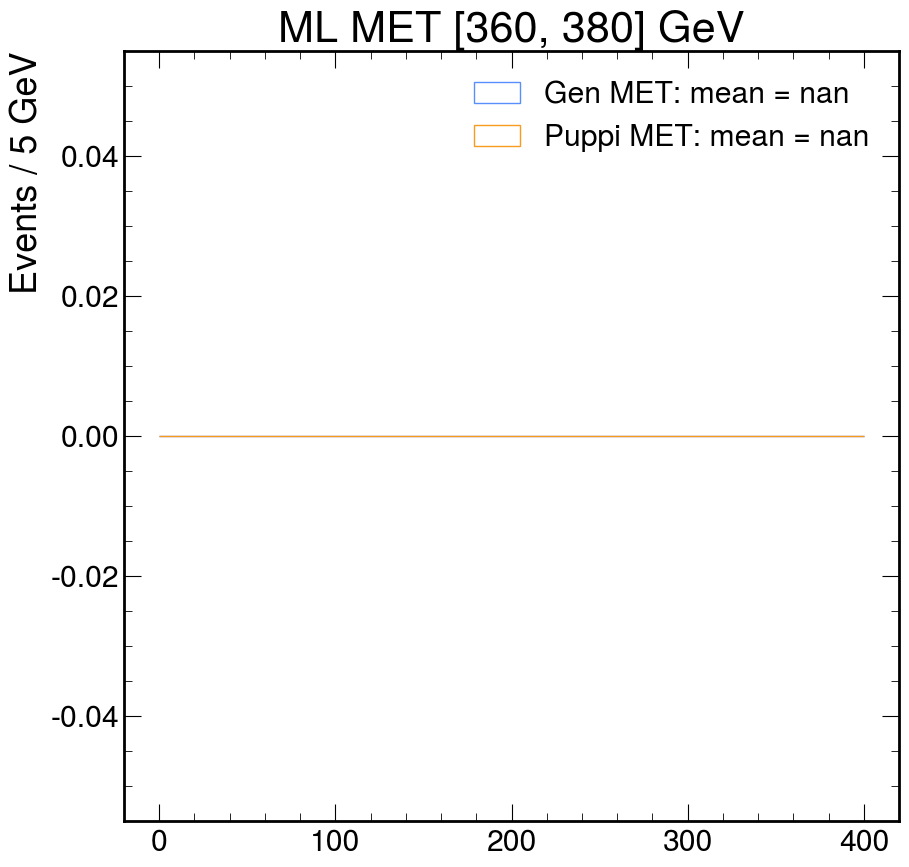

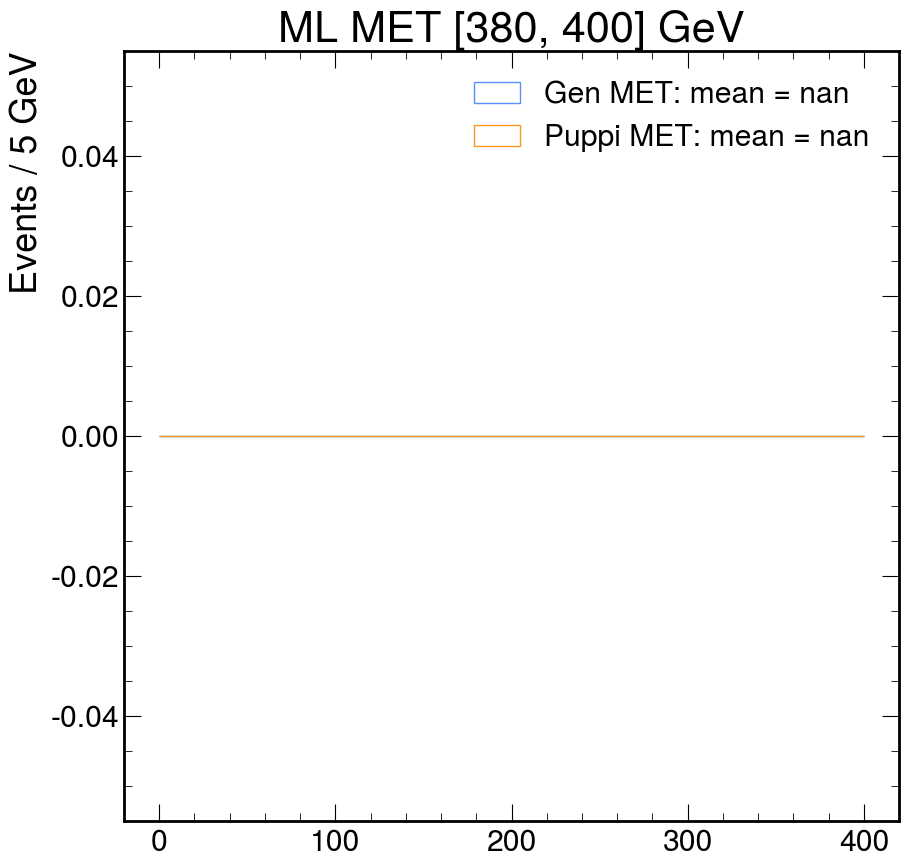

In [56]:
hist_bins = np.linspace(0, 400, num=80+1)

bin_i = 0

for bin_i in range(len(ml_MET)):
    plt.figure()
    
    #plt.hist(ml_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'ML MET: mean = {ml_MET[bin_i].mean():.1f}')
    plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Gen MET: mean = {gen_MET[bin_i].mean():.1f}')
    plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')

    plt.ylabel('Events / 5 GeV')

    plt.title(f'ML MET [{binnings[bin_i]:.0f}, {binnings[bin_i+1]:.0f}] GeV')
    plt.legend()
    
    plt.show()

### Plot MET

In [57]:
genMET = np.array(genMET)
genMET_binned = []

nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

for idx in range(len(binnings)-1):
    genMET_binned.append( np.logical_and(genMET > binnings[idx], genMET < binnings[idx+1]) )

In [58]:
MLMET = np.array(MET)
MLMET_binned = []

for idx in range(len(binnings)-1):
    MLMET_binned.append( np.logical_and(MLMET > binnings[idx], MLMET < binnings[idx+1]) )

In [59]:
puppiMET = np.array(puppiMET)
puppiMET_binned = []

for idx in range(len(binnings)-1):
    puppiMET_binned.append( np.logical_and(puppiMET > binnings[idx], puppiMET < binnings[idx+1]) )

In [60]:
genMET_binned_entries = [sum(genMET_binned[i]) for i in range(len(genMET_binned))]

In [61]:
MLMET_binned_entries = [sum(MLMET_binned[i]) for i in range(len(MLMET_binned))]

In [62]:
MLMET_binned_entries

[0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [63]:
genMET_binned_entries

[11348,
 30211,
 39173,
 38584,
 31198,
 20808,
 11936,
 6806,
 3731,
 2080,
 1262,
 806,
 525,
 342,
 243,
 170,
 125,
 80,
 73,
 36]

In [64]:
puppiMET_binned_entries = [sum(puppiMET_binned[i]) for i in range(len(puppiMET_binned))]

In [65]:
import ROOT as r

hGenMET = r.TH1D('genMET', 'genMET', nbins, 0, 400)
hMLMET = r.TH1D('MLMET', 'MLMET', nbins, 0, 400)
hPuppiMET = r.TH1D('PuppiMET', 'puppiMET', nbins, 0, 400)

ModuleNotFoundError: No module named 'ROOT'

In [66]:
for i in range(nbins):
    hGenMET.SetBinContent(i+1, genMET_binned_entries[i])
    hMLMET.SetBinContent(i+1, MLMET_binned_entries[i])
    hPuppiMET.SetBinContent(i+1, puppiMET_binned_entries[i])

NameError: name 'hGenMET' is not defined

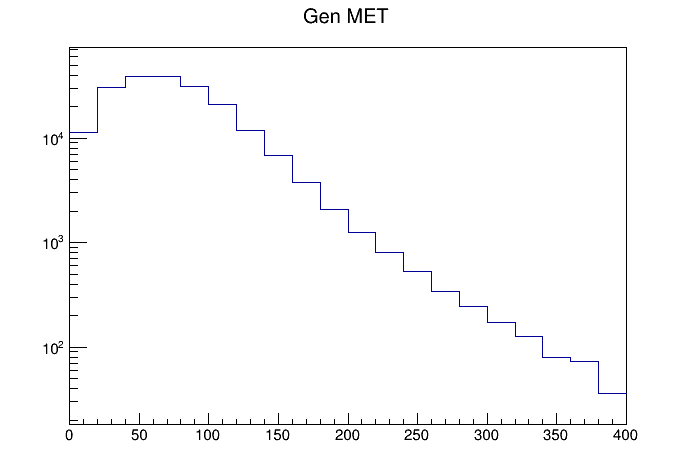

In [70]:
r.gStyle.SetOptStat(0)

c = r.TCanvas()

'''
hMLMET.Draw()
hMLMET.GetXaxis().SetTitle('MET')
hMLMET.GetYaxis().SetTitle('Events / 20GeV')
hMLMET.SetTitle('MET')
'''

hGenMET.Draw()
hGenMET.SetTitle('Gen MET')

'''
hPuppiMET.Draw('SAME')

hMLMET.SetLineColor(2)
hGenMET.SetLineColor(4)
hPuppiMET.SetLineColor(6)

legend = r.TLegend(0.6,0.65,0.9,0.85)
r.gStyle.SetLegendBorderSize(0)
legend.AddEntry(hMLMET,"ML MET","f")
legend.AddEntry(hGenMET,"GenMET","l")
legend.AddEntry(hPuppiMET, "PuppiMET")
legend.Draw('SAME')

'''
c.SetLogy()

c.Draw()

In [79]:
# plot the response versus other checkpoint results 
def load_ckpts(ckpts):
    prefix = '/export/home/phys/sdurgut/test_L1DeepMetv2/L1DeepMETv2'
    ckpts = f'{prefix}/{ckpts}'
    a=load(ckpts + '/best.resolutions')
    return a


In [80]:
baseline_ckpts = load_ckpts('ckpts_ttbar_batch_32_lr_0.1_wd_0.001_loss_fn_response_tune_500-woembedding')

In [82]:
baseline_ckpts.keys()

dict_keys(['MET', 'puppiMET'])

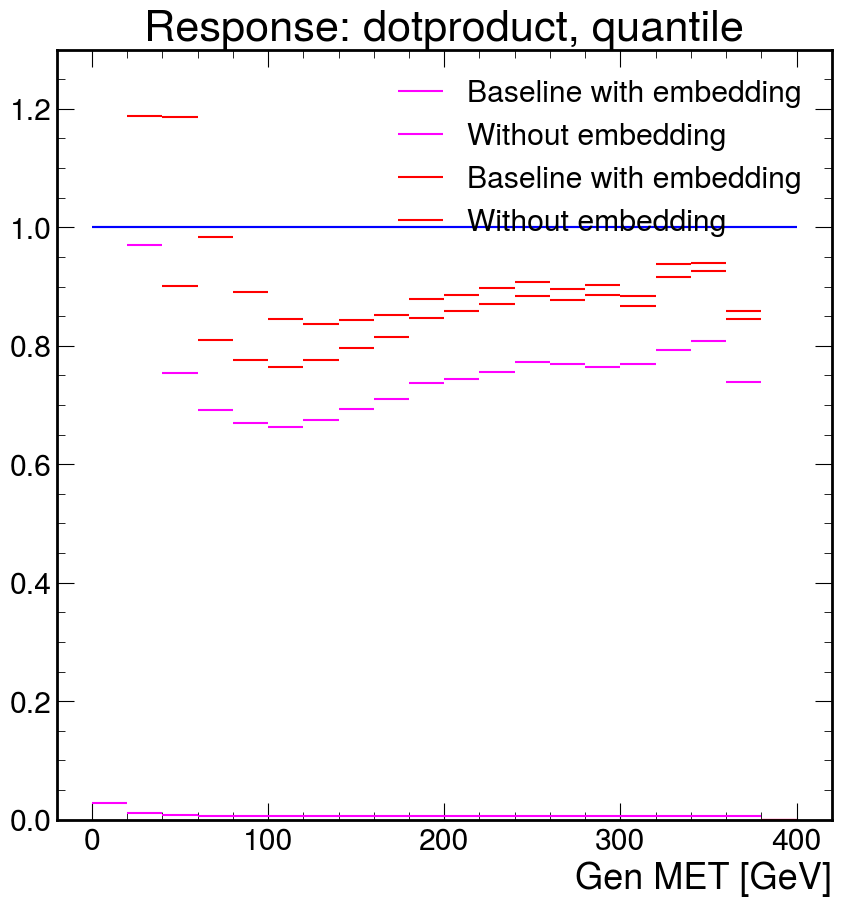

In [86]:
for key in baseline_ckpts.keys():
    #plot baseline response vs GNN response
    plt.figure(1)
    xx = baseline_ckpts[key]['R'][1][0:20]
    if key == 'MET':
        yy_1 = baseline_ckpts[key]['R'][0]/128
        yy_2 = a[key]['R'][0]/128 
    else: 
        yy_1 = baseline_ckpts[key]['R'][0]
        yy_2 = a[key]['R'][0]
        
    plt.hlines(yy_1, xx, xx+20, color=colors[key], label='Baseline with embedding')
    plt.hlines(yy_2, xx, xx+20, color=colors[key], label='Without embedding')
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')
    plt.ylim([0,1.3])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response: dotproduct, quantile')
    
    